In [7]:
import subprocess

# 설치할 라이브러리 리스트
libraries_to_install = [
    'matplotlib',  # 올바른 이름으로 수정
    'seaborn',
    'missingno',
    'xgboost',
    'lightgbm',
    'imbalanced-learn',
    'bayesian-optimization',
    'category-encoders',
    'eli5',
    'shap',
    'koreanize-matplotlib'
]

for library in libraries_to_install:
    subprocess.call(['pip', 'install', library])
    
    


In [10]:
!pip install "scikit-learn<1.3" --user



In [2]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import koreanize_matplotlib  
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import glob
# 데이터 전처리 후 시각화에 도움을 주는 라이브러리
import missingno as msno
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.impute import MissingIndicator, SimpleImputer
from sklearn.preprocessing import RobustScaler, OneHotEncoder, LabelEncoder
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import IsolationForest, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline, Pipeline, FeatureUnion, make_union
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import collections
import imblearn
from imblearn.over_sampling import ADASYN, RandomOverSampler, SMOTENC, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN, SMOTETomek
import os
from bayes_opt import BayesianOptimization
from sklearn.base import TransformerMixin
from sklearn.base import BaseEstimator
from sklearn.decomposition import PCA

import tensorflow as tf
from scipy.stats import chi2_contingency, ttest_ind
import category_encoders as CE

import eli5
from eli5.sklearn import PermutationImportance

import shap

for dirname, _, filenames in os.walk('../kaggle/MLproject_dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.max_columns', 100) 

## 통신사 고객 탐색적 데이터 분석(EDA)

In [3]:
train = pd.read_csv('./data/cell2celltrain.csv')
train

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,6.3,0.0,0.0,97.2,0.0,0.0,58.0,24.0,1.3,0.0,0.3,61,2,1,SEAPOR503,2.0,2.0,361.0,62.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,1,0,No,No,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,0.0,2.7,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.3,0.0,0.0,58,1,1,PITHOM412,2.0,1.0,1504.0,40.0,42.0,Yes,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,Yes,No,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.3,0.0,1.3,3.7,0.0,0.0,0.0,60,1,1,MILMIL414,1.0,1.0,1812.0,26.0,26.0,Yes,No,No,No,No,Unknown,No,No,No,No,No,Yes,0,0,Yes,No,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,7.7,76.0,4.3,1.3,200.3,370.3,147.0,555.7,303.7,59.7,0.0,22.7,59,2,2,PITHOM412,9.0,4.0,458.0,30.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,Yes,No,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,2,2,OKCTUL918,4.0,3.0,852.0,46.0,54.0,No,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,No,Yes,0,9,No,1,10,No,1-Highest,Other,Professional,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51042,3399958,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.3,2.7,48.3,0.0,0.0,58.9,17.0,1.3,160.3,33.3,12.0,0.0,0.3,29,1,1,LAXSFN818,2.0,2.0,526.0,68.0,64.0,No,Yes,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,No,No,0,6,No,0,60,No,1-Highest,Suburban,Other,Yes
51043,3399974,No,95.17,1745.0,85.0,0.99,45.0,4.7,122.0,15.9,16.7,0.7,41.3,0.0,0.0,681.5,89.7,33.3,318.7,248.3,17.3,0.0,14.3,29,1,1,LAXCDG310,2.0,2.0,464.0,48.0,48.0,Yes,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,No,No,0,9,No,1,60,No,3-Good,Other,Other,No
51044,3399978,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.7,4.3,287.0,1.3,13.7,1225.3,430.3,87.7,1359.0,910.3,76.0,0.0,6.7,25,1,1,LAXCDG310,3.0,2.0,378.0,36.0,0.0,No,No,Yes,No,No,Known,No,No,No,No,No,Yes,0,0,No,No,0,7,No,1,80,No,5-Low,Other,Clerical,No
51045,3399990,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31,1,1,NEVPOW619,2.0,2.0,433.0,32.0,0.0,Yes,No,Yes,No,No,Unknown,No,No,No,No,No,No,0,0,No,No,0,9,No,0,30,No,5-Low,Other,Other,No


In [4]:
train.columns

Index(['CustomerID', 'Churn', 'MonthlyRevenue', 'MonthlyMinutes',
       'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes',
       'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues',
       'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls',
       'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls',
       'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls',
       'CallForwardingCalls', 'CallWaitingCalls', 'MonthsInService',
       'UniqueSubs', 'ActiveSubs', 'ServiceArea', 'Handsets', 'HandsetModels',
       'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2', 'ChildrenInHH',
       'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner',
       'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers',
       'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard',
       'RetentionCalls', 'RetentionOffersAccepted', 'NewCellphoneUser',
       'NotNewCellphoneUser', 'ReferralsMadeBySubscriber', 'IncomeGro

- CustomerID, ServiceArea 컬럼 삭제
- family 컬럼 생성 : MaritalStatus, ChildrenInHH 이용하여 Nuclear Families, Childless, Single-parent, Unknown 로 구분

In [5]:
# CustomerID, ServiceArea 컬럼 삭제
train = train.drop(["CustomerID", "ServiceArea"], axis=1)

In [6]:
# family 컬럼 생성
family_type = train.apply(lambda row : 'Nuclear Families' if (row['ChildrenInHH'] == 'Yes') & 
                          (row['MaritalStatus'] == 'Yes') else 'Childless' if (row['ChildrenInHH'] == 'No') & 
                          (row['MaritalStatus'] == 'Yes') else 'Single-parent' if (row['ChildrenInHH'] == 'Yes') & 
                          (row['MaritalStatus'] == 'No') else 'Unknown', axis=1)

train['Family'] = family_type
train[['AgeHH1','AgeHH2','MaritalStatus', 'ChildrenInHH', 'Family']]

,AgeHH1,AgeHH2,MaritalStatus,ChildrenInHH,Family
0,62.0,0.0,No,No,Unknown
1,40.0,42.0,Yes,Yes,Nuclear Families
2,26.0,26.0,Yes,Yes,Nuclear Families
3,30.0,0.0,No,No,Unknown
4,46.0,54.0,Yes,No,Childless
...,...,...,...,...,...
51042,68.0,64.0,Yes,No,Childless
51043,48.0,48.0,No,Yes,Single-parent
51044,36.0,0.0,No,No,Unknown
51045,32.0,0.0,No,Yes,Single-parent


### 필요 컬럼 생성
- age 컬럼 생성
- 항목 개수를 확인하기 위해 'count' 컬럼 생성
- 범주형, 수치형 구분하여 dataframe 생성

In [7]:
# age 컬럼 생성
train['Age'] = (train['AgeHH1'] + train['AgeHH2'])/2
train.drop(['AgeHH1', 'AgeHH2'], axis=1, inplace=True)

# 항목 개수를 확인하기 위해 'count' 컬럼 생성
train['count'] = 1

# 이탈 고객과 미이탈 고객의 dataframe 각각 생성
churn_y = train[train['Churn']=='Yes']
churn_y = churn_y.reset_index(drop=True)

churn_n = train[train['Churn']=='No']
churn_n = churn_n.reset_index(drop=True)

# dataframe 이름과 컬럼명을 넣으면 항목별 비율 반환하는 함수
def get_percent(df_name, column_name):
    return round(df_name[column_name].value_counts() / len(df_name) * 100, 1)

# dataframe 이름과 컬럼명을 넣으면 항목별 비율을 피벗테이블로 반환하는 함수
def pivot_percent(df_name, column_name):
    pivot_table = df_name.pivot_table(index=column_name, columns='Churn', values='count', aggfunc=np.sum) / len(df_name) * 100
    
    return round(pivot_table, 1)

# 범주형, 수치형 구분하여 dataframe 생성
# HandsetPrice는 수치형인데 Unknown값이 들어가 있어서 제외
numeric_features = train[['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes', 
                         'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues', 'DroppedCalls', 'BlockedCalls', 'UnansweredCalls',
                         'CustomerCareCalls', 'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls', 'PeakCallsInOut',
                         'OffPeakCallsInOut', 'DroppedBlockedCalls', 'CallForwardingCalls', 'CallWaitingCalls', 'MonthsInService',
                         'UniqueSubs', 'ActiveSubs', 'Handsets', 'HandsetModels', 'CurrentEquipmentDays', 'RetentionCalls',
                         'RetentionOffersAccepted', 'ReferralsMadeBySubscriber', 'AdjustmentsToCreditRating', 'Age']]

categoric_features = train[['ChildrenInHH', 'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner', 'Homeownership',
                            'BuysViaMailOrder', 'RespondsToMailOffers', 'OptOutMailings', 'NonUSTravel', 'OwnsComputer',
                            'HasCreditCard', 'NewCellphoneUser', 'NotNewCellphoneUser', 'IncomeGroup', 'OwnsMotorcycle',
                            'MadeCallToRetentionTeam', 'CreditRating', 'PrizmCode', 'Occupation', 'MaritalStatus', 'Family', 'Churn']]

### Categoric Columns

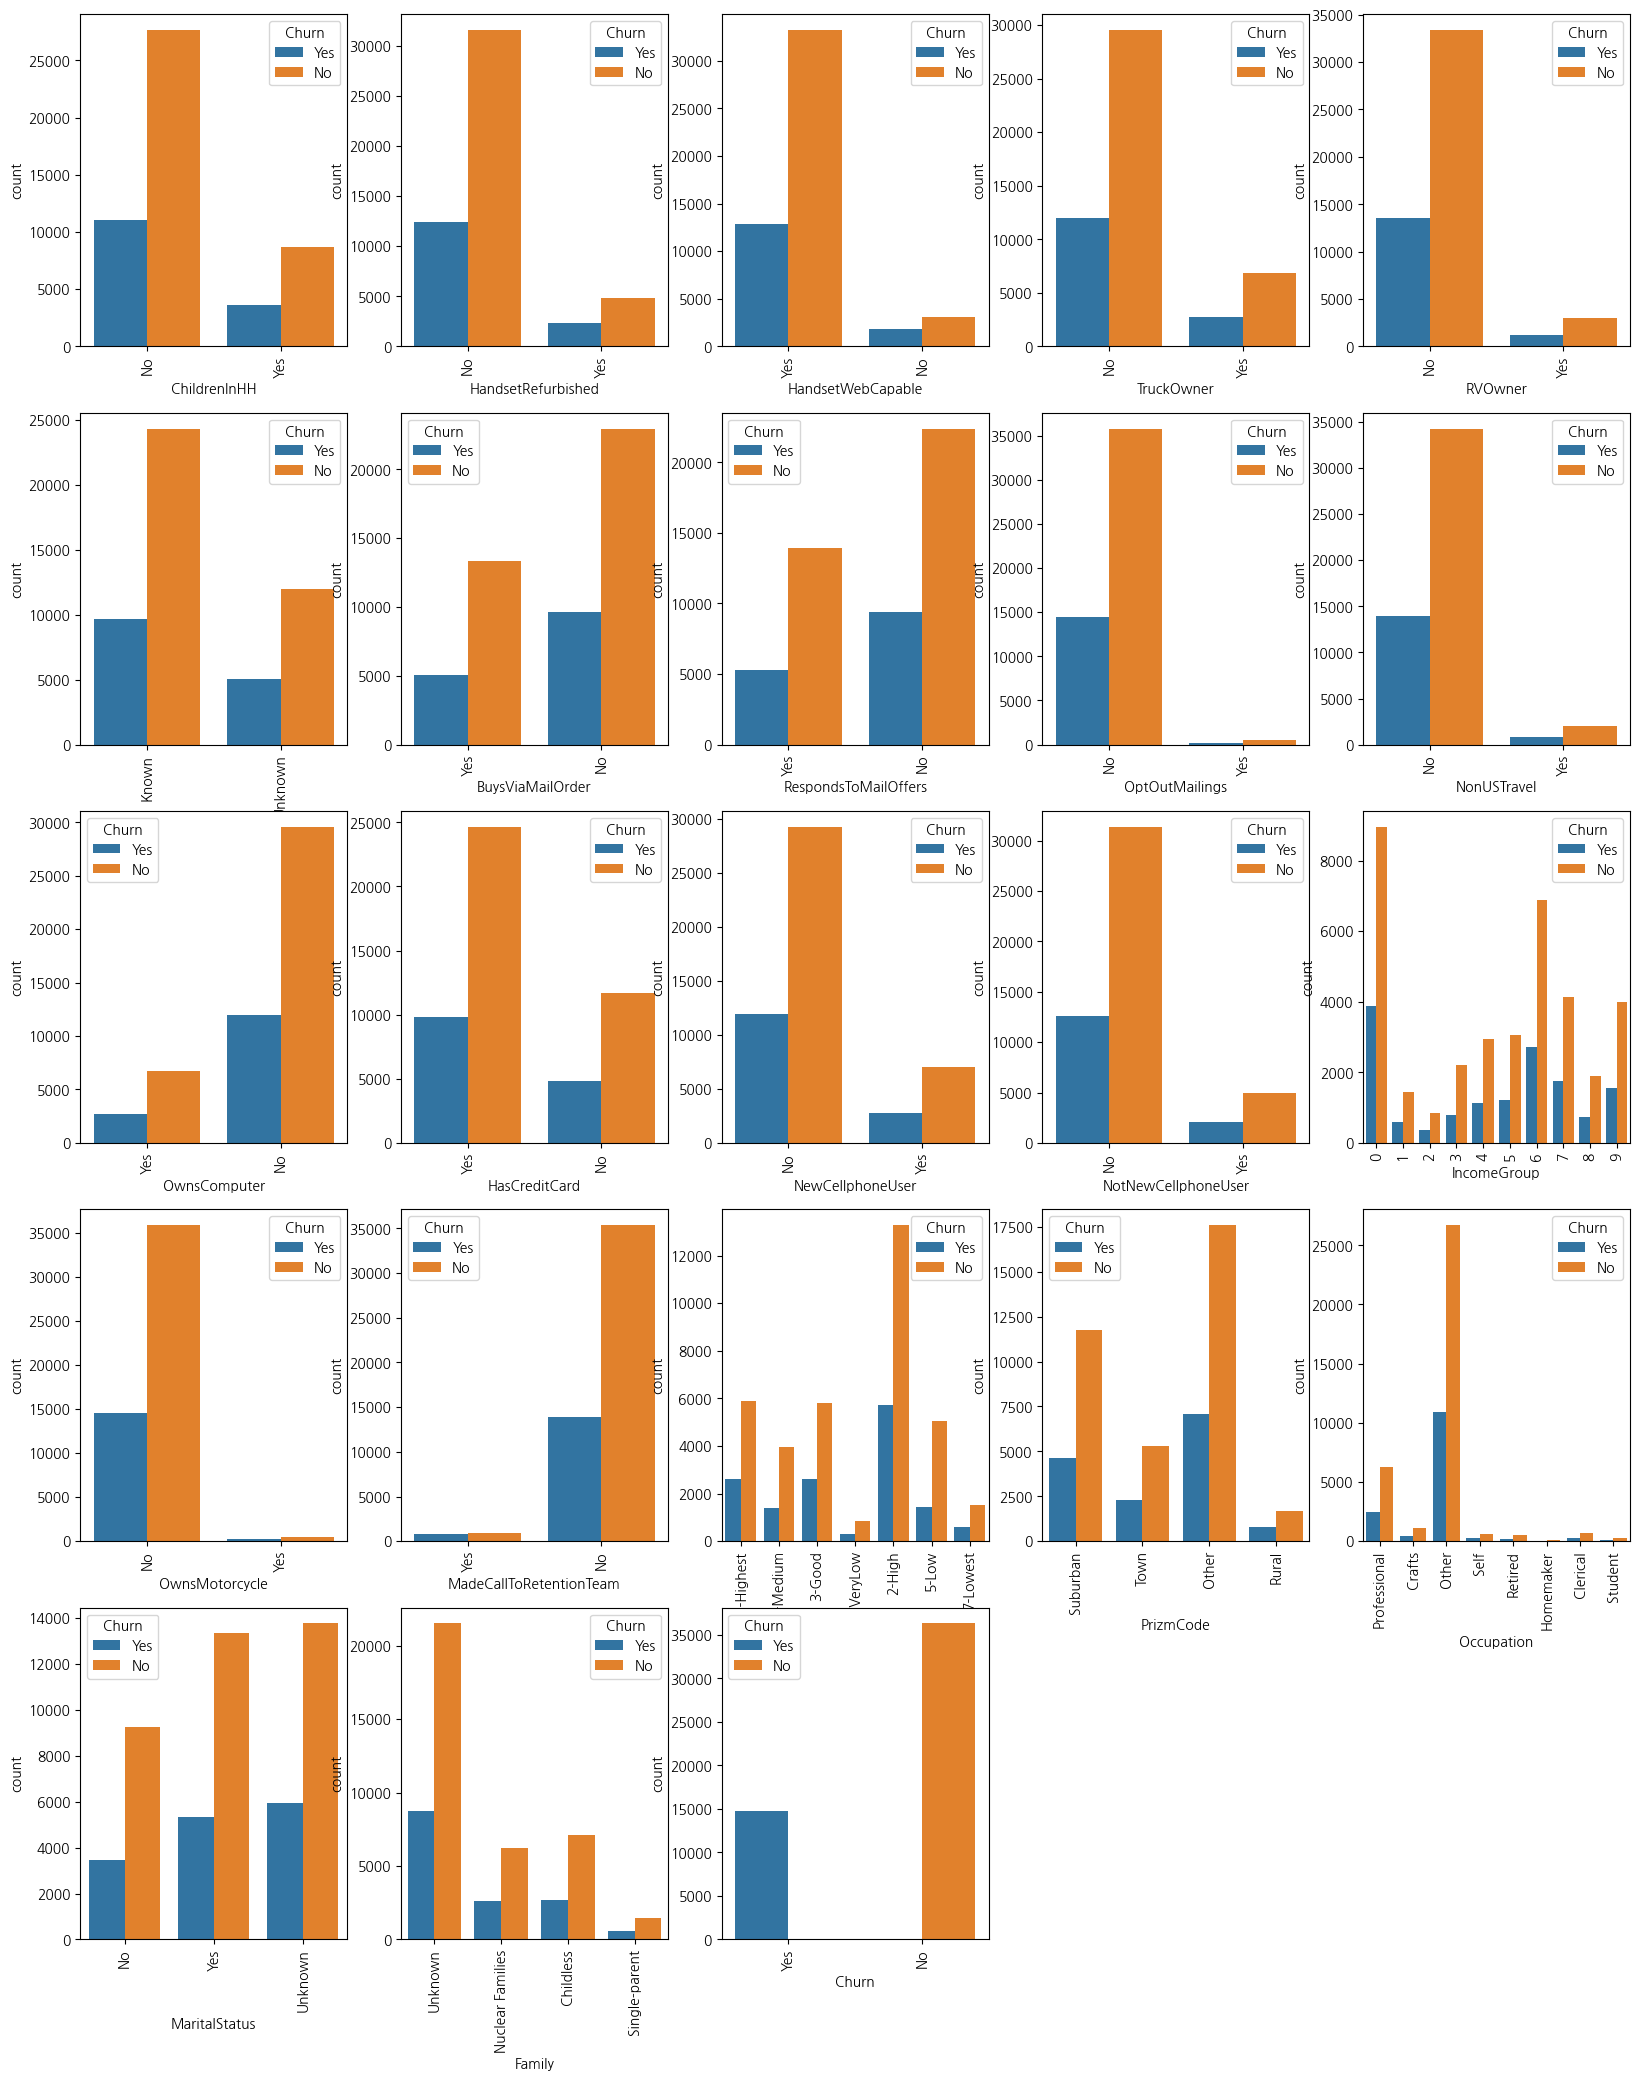

In [8]:
plots_per_row = 5

number_of_plots = categoric_features.shape[-1]

fig, axes = plt.subplots((number_of_plots//plots_per_row) + (number_of_plots % 5 != 0), plots_per_row)

axes = axes.flatten()

count = 0
for index, col in categoric_features.columns.to_series().items():
    a = sns.countplot(x=categoric_features[col], hue=categoric_features.Churn, ax=axes[count])
    a.tick_params(axis='x', labelrotation=90)
    count += 1
    
for i in range(1, len(axes) - number_of_plots + 1):
    fig.delaxes(axes[-i]) # 빈 subplot은 삭제
    
fig.set_figwidth(20)
fig.set_figheight(25)
plt.show()

#### 정의하기 어려운 컬럼(PrizmCode, Occupation, Homeownership, MaritalStatus)

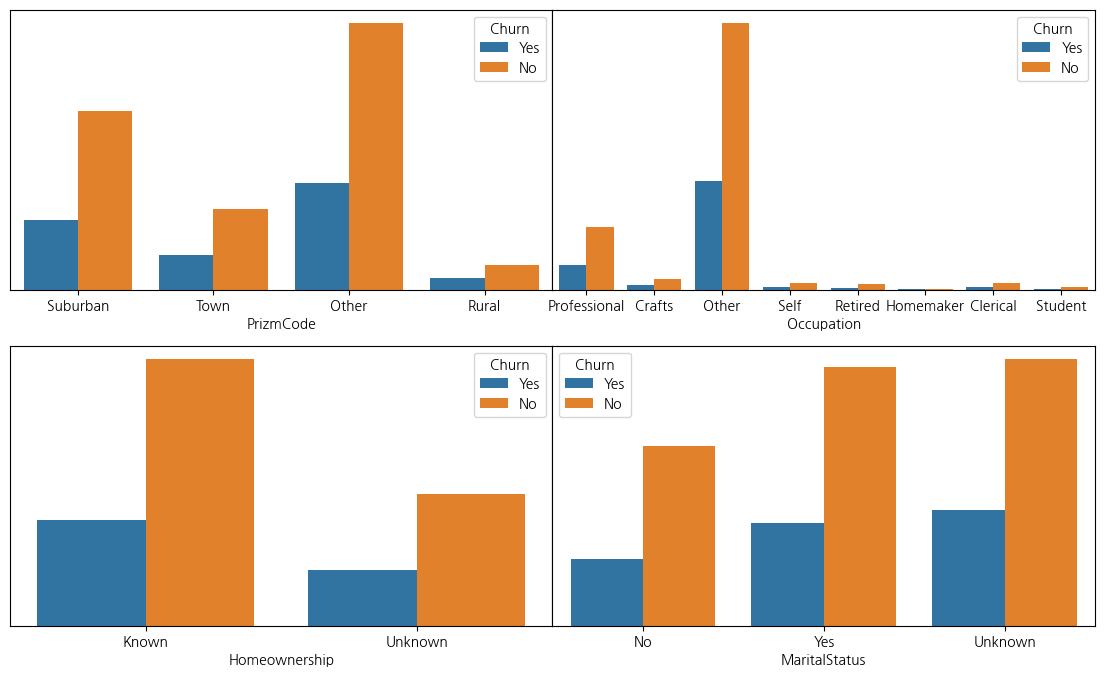

In [9]:
plt.figure(figsize=(14, 8))
plt.subplots_adjust(wspace=0) #그래프 사이 간격 조정

plt.subplot(2, 2, 1)
plt.gca().axes.yaxis.set_visible(False) # y축만 없애기
sns.countplot(data=train, x='PrizmCode', hue='Churn')

plt.subplot(2, 2, 2)
plt.gca().axes.yaxis.set_visible(False) 
sns.countplot(data=train, x='Occupation', hue='Churn')

plt.subplot(2, 2, 3)
plt.gca().axes.yaxis.set_visible(False) 
sns.countplot(data=train, x='Homeownership', hue='Churn')

plt.subplot(2, 2, 4)
plt.gca().axes.yaxis.set_visible(False) 
sns.countplot(data=train, x='MaritalStatus', hue='Churn')
    
plt.show()

* Other값이 많은 컬럼: PrizmCode, Occupation
* Unknown값이 많은 컬럼: Homeownership, MaritalStatus

### Numeric Columns

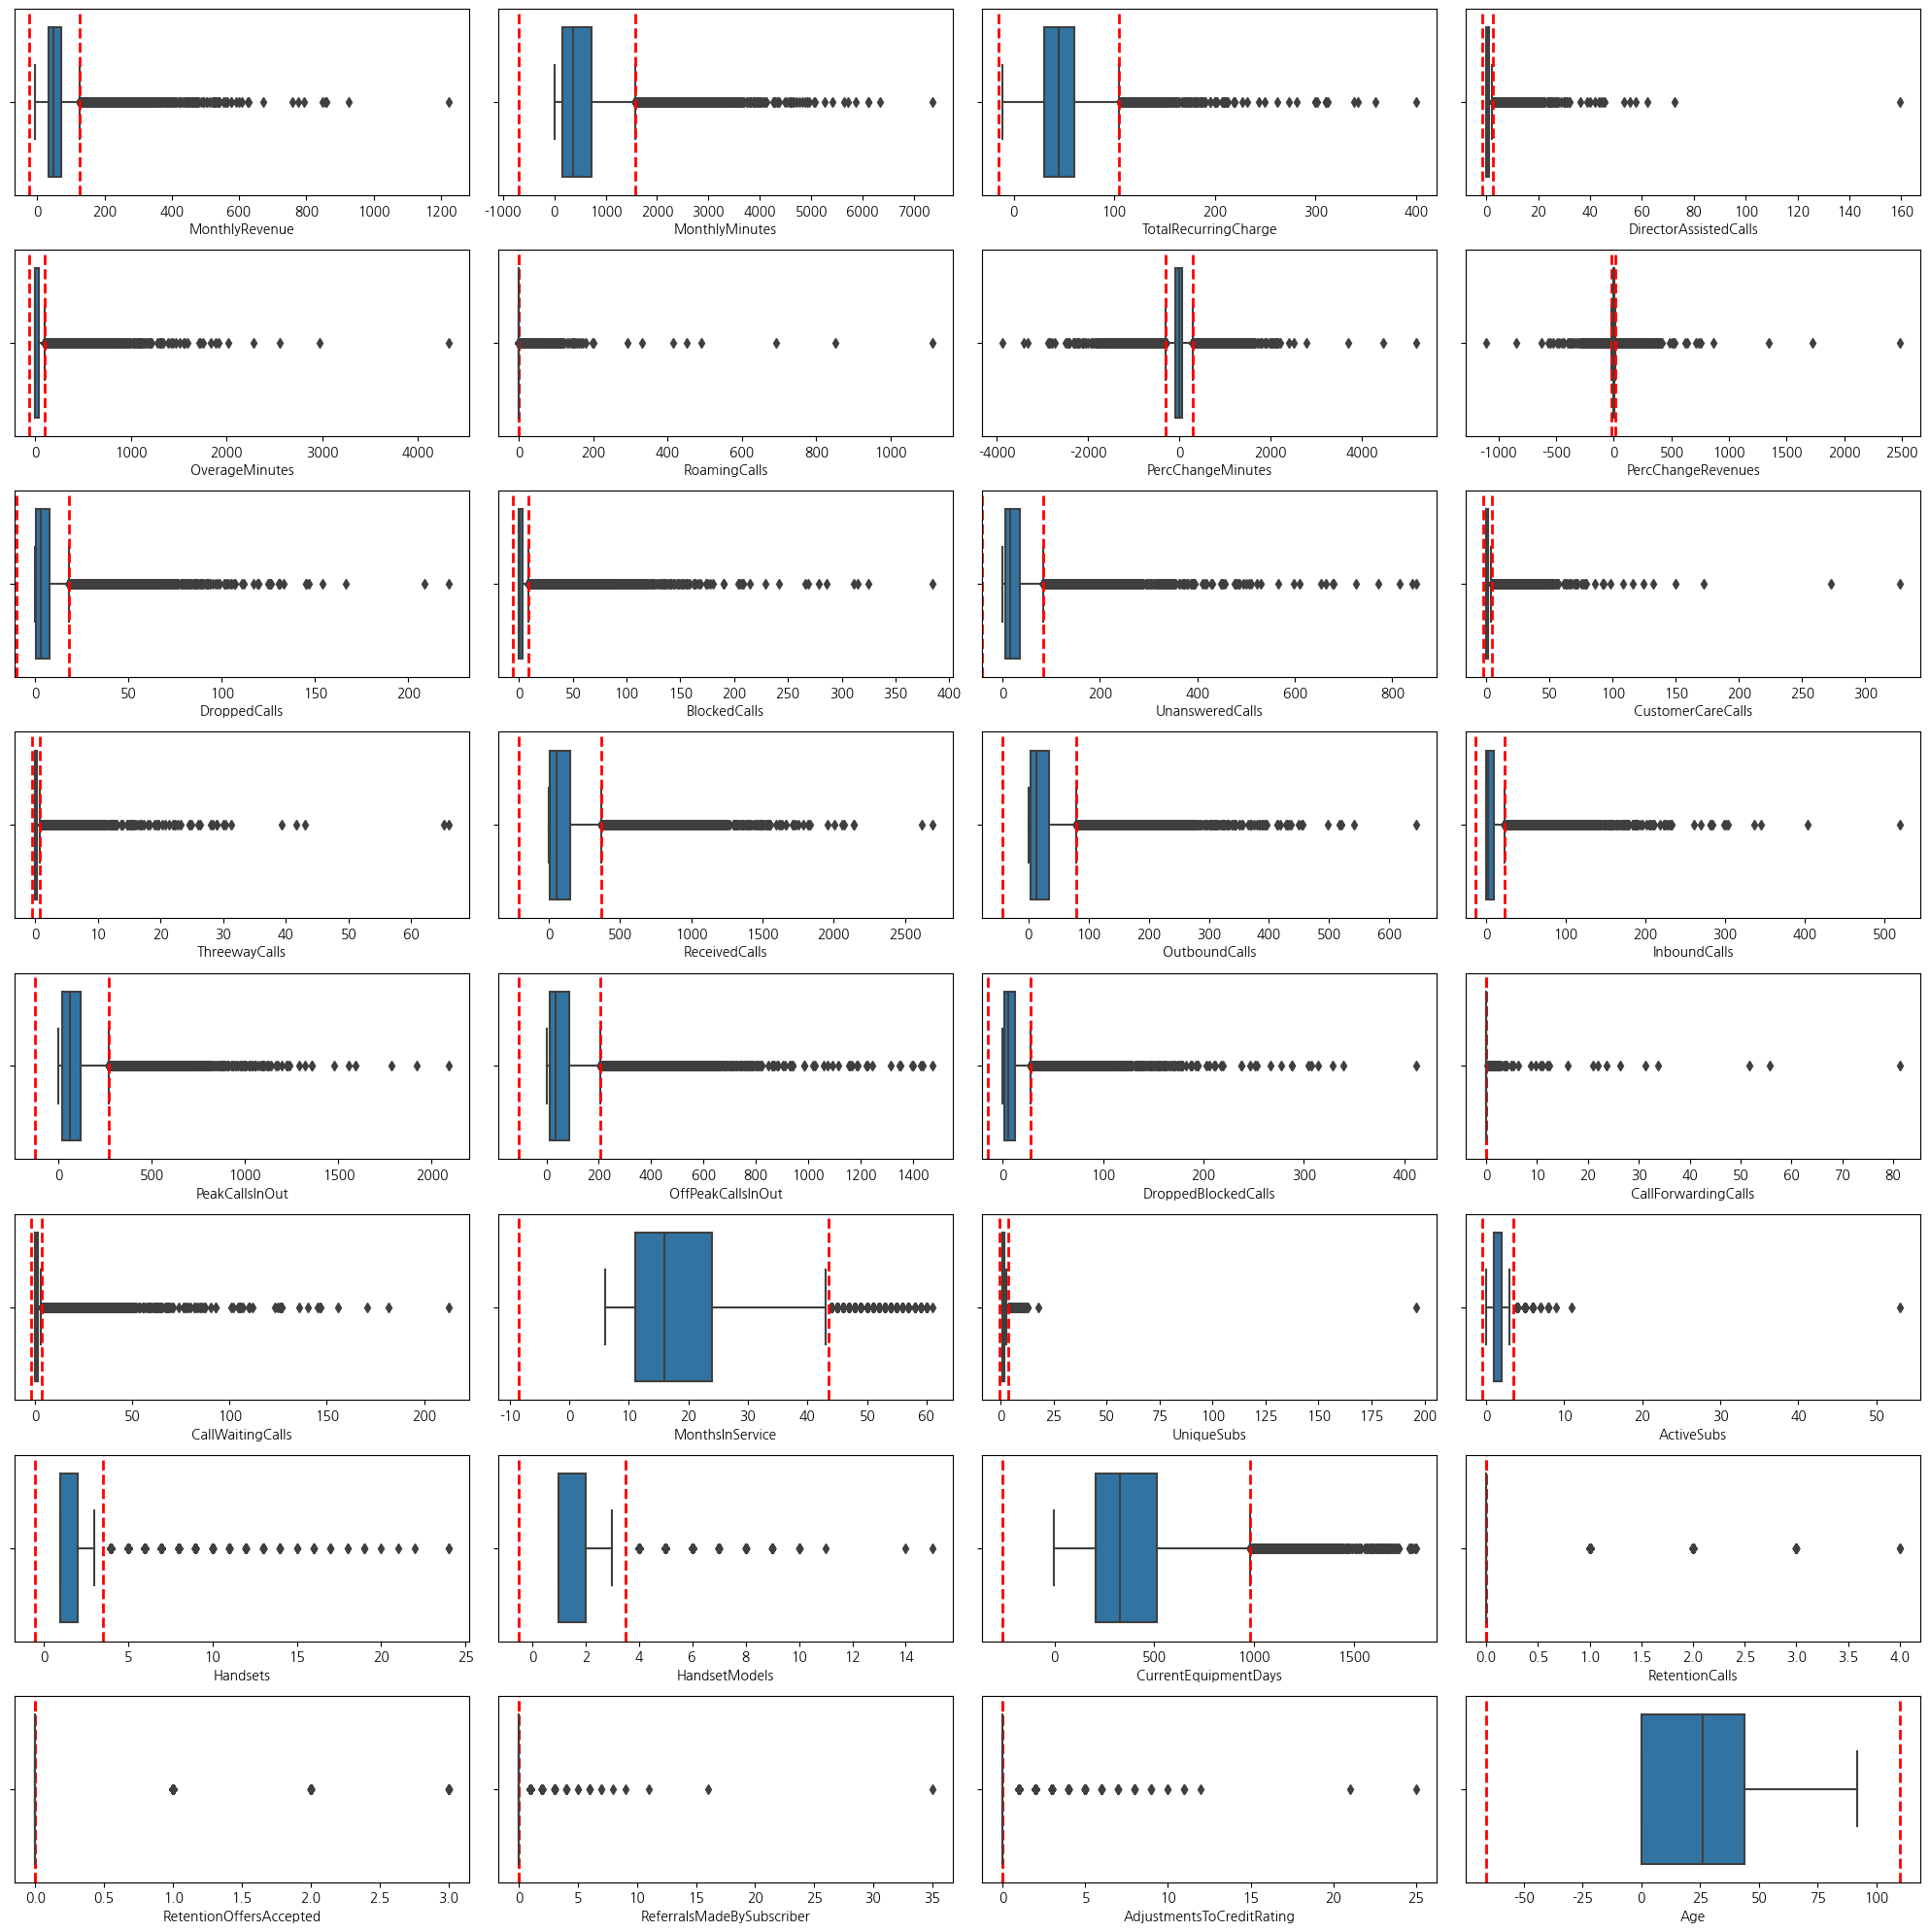

In [10]:
num_rows = 8
num_cols = 4

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20))

axes = axes.flatten()

for i, column in enumerate(numeric_features.columns):
    sns.boxplot(x=train[column], ax=axes[i])
    
    Q1 = train[column].quantile(0.25)
    Q3 = train[column].quantile(0.75)
    IQR = Q3 - Q1
    upper_fence = Q3 + 1.5 * IQR
    lower_fence = Q1 - 1.5 * IQR
    
    axes[i].axvline(upper_fence, color='r', linestyle='--', linewidth=2)
    axes[i].axvline(lower_fence, color='r', linestyle='--', linewidth=2)

if len(numeric_features.columns) < len(axes):
    for j in range(len(numeric_features.columns), len(axes)):
        axes[j].axis('off')

plt.tight_layout()
plt.show()

#### HandsetPrice 컬럼

* Unknown값이 28,982개로 전체 데이터의 절반 이상을 차지한다.

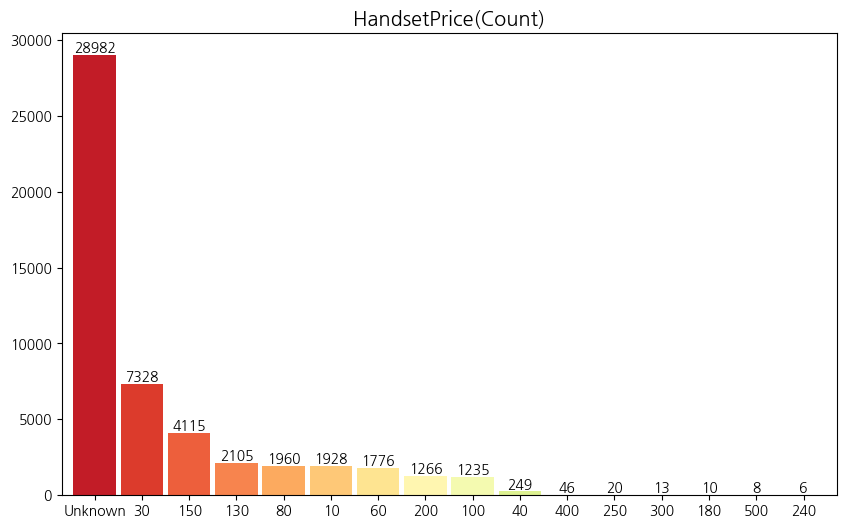

In [11]:
colors = sns.color_palette('RdYlGn', 16)
ax = train.HandsetPrice.value_counts().plot(kind="bar", figsize=(10, 6), width=0.9, color=colors)

for c in ax.containers:
    labels = [ x.get_height() for x in c ]
    ax.bar_label(c, labels= np.round(labels, 1), label_type='edge')
    
plt.rcParams['font.size'] = 12
plt.title('HandsetPrice(Count)')
plt.xticks(rotation=0)
plt.show()

### 고객 이탈 비율

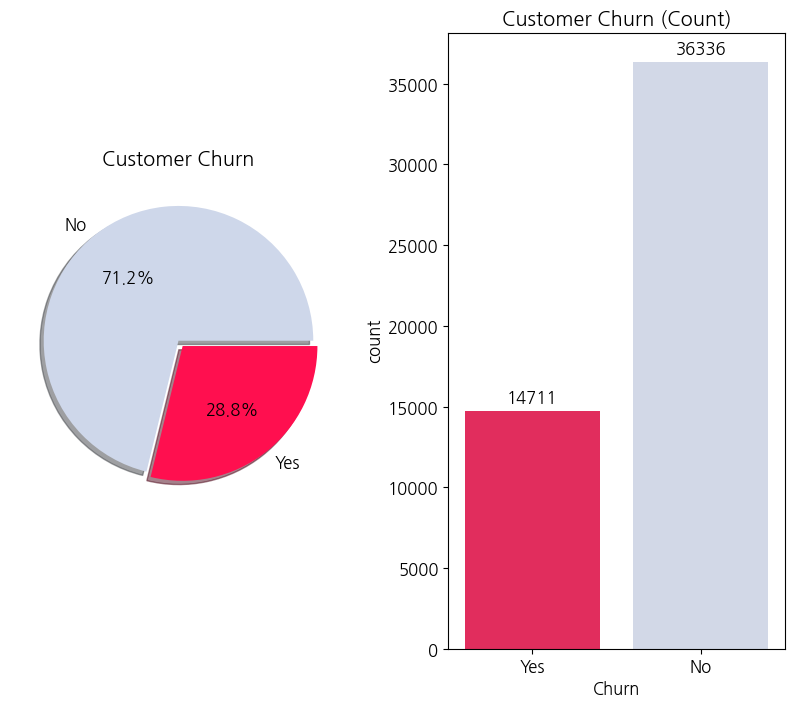

In [12]:
f, ax = plt.subplots(1, 2, figsize = (10, 8)) 
plt.subplots_adjust(wspace=0.3)

train['Churn'].value_counts().plot.pie(explode = [0, 0.05], # 각 조각 사이 거리
                                       autopct='%1.1f%%', # 퍼센트 표시
                                       ax=ax[0], # 첫번째 위치에 그리기
                                       colors=['#CED7EA', '#ff0f4f'],
                                       shadow=True) 

ax[0].set_title('Customer Churn')
ax[0].set_ylabel('') 

sns.countplot(data=train, x='Churn', ax=ax[1], palette=['#ff0f4f','#CED7EA'])
for p in ax[1].patches: # 데이터 텍스트 표시 
    ax[1].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center',
                   xytext=(0, 10), textcoords='offset points')    
ax[1].set_title('Customer Churn (Count)')

plt.rcParams['font.size'] = 12

plt.show()

### 결혼 여부

* 기혼 고객의 이탈률이 더 높은 편이다.

In [13]:
def draw_count_plot(df, title1, title2, x1, x2, hue):
    f, ax = plt.subplots(1,2, figsize=(10,8))
    plt.subplots_adjust(wspace=0.3)

    ax[0].set_title(title1)
    sns.countplot(x=x1, data=df, ax=ax[0], palette=['#3498db', '#f06060', '#66c9b0', '#fcee9c'])
    for p in ax[0].patches: # 데이터 텍스트 표시  
        ax[0].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center',
                       va='center', xytext=(0, 10), textcoords='offset points') 

    ax[1].set_title(title2)
    sns.countplot(x=x2, data=df, hue=hue, ax=ax[1], palette=['#ff0f4f', '#CED7EA'])
    for p in ax[1].patches: # 데이터 텍스트 표시 
        ax[1].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center',
                       va='center', xytext=(0, 10), textcoords='offset points')

    plt.tight_layout()
    plt.show()

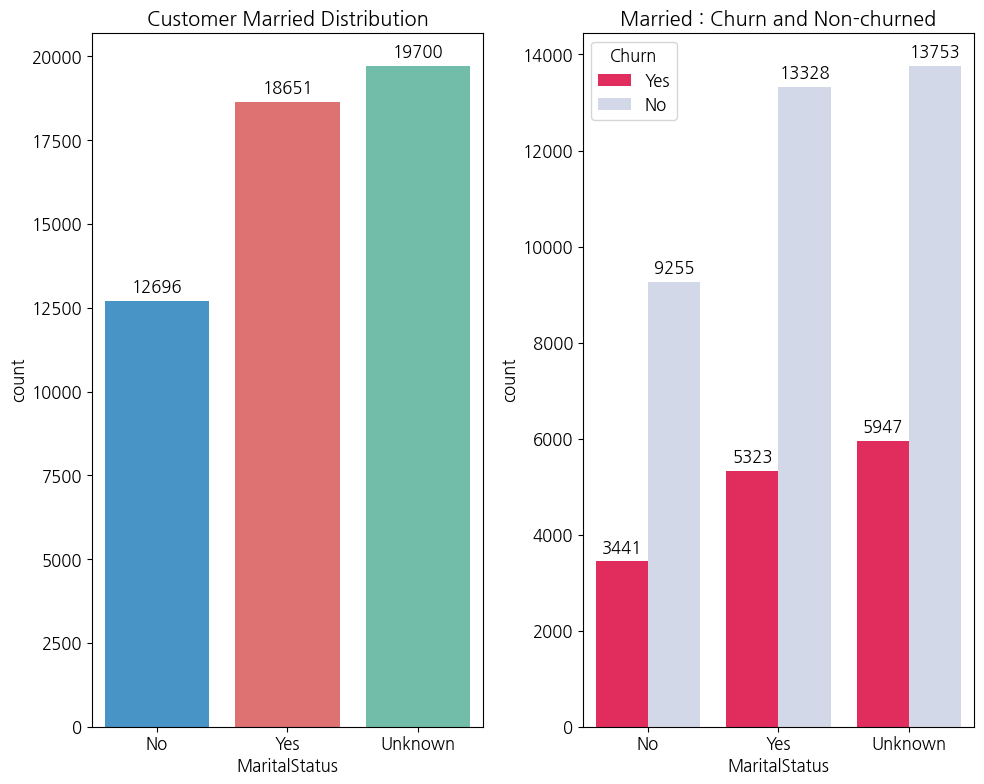

In [14]:
draw_count_plot(train,'Customer Married Distribution', 'Married : Churn and Non-churned','MaritalStatus','MaritalStatus', 'Churn')

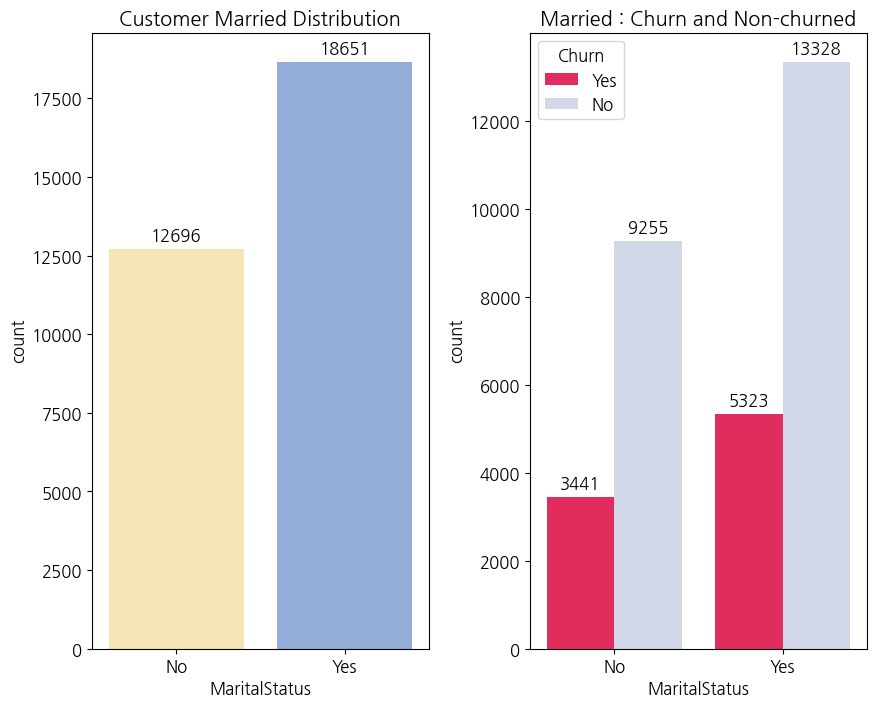

In [15]:
# Unknown 데이터 제거
marriage = train[train['MaritalStatus'] != 'Unknown']

f, ax = plt.subplots(1,2, figsize=(10,8))
plt.subplots_adjust(wspace=0.3)

ax[0].set_title('Customer Married Distribution')
sns.countplot(x='MaritalStatus', data=marriage, ax=ax[0], palette=['#ffecab', '#89aae3'])

for p in ax[0].patches: # 데이터 텍스트 표시  
    ax[0].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', 
                   va='center', xytext=(0, 10), textcoords='offset points') 

ax[1].set_title('Married : Churn and Non-churned')
sns.countplot(x='MaritalStatus', data=marriage, hue='Churn', ax=ax[1], palette=['#ff0f4f', '#CED7EA'])

for p in ax[1].patches: # 데이터 텍스트 표시 
    ax[1].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', 
                   va='center', xytext=(0, 10), textcoords='offset points')

plt.rcParams['font.size'] = 12
plt.show()

### 자녀 유무

* 자녀가 없는 고객의 이탈률이 더 높은 편이다.

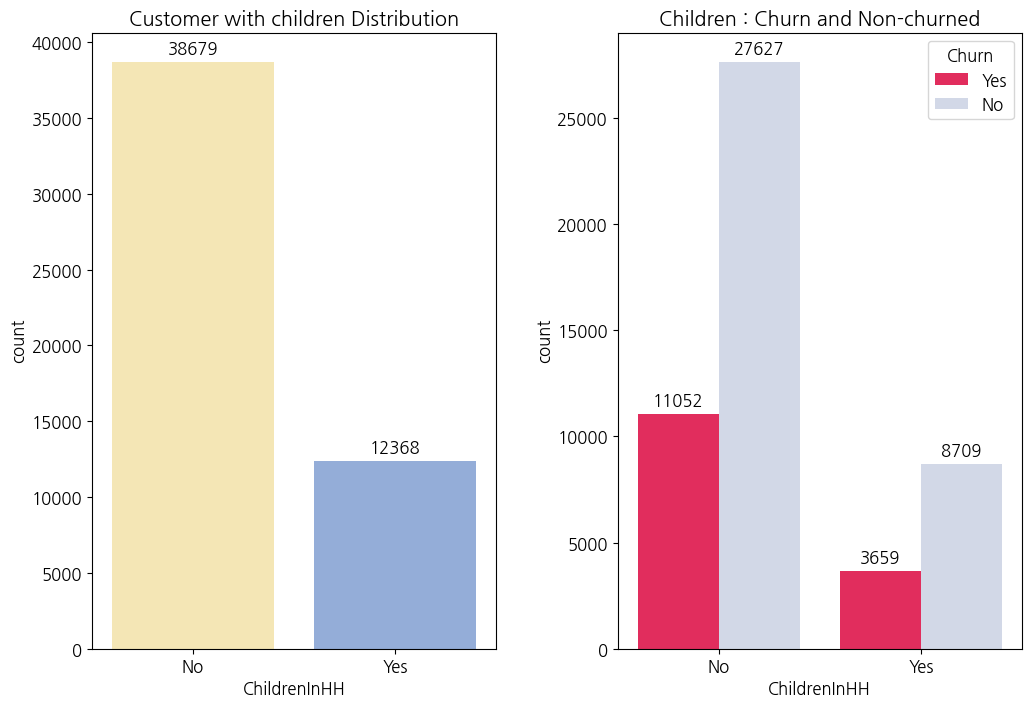

In [16]:
f, ax = plt.subplots(1,2, figsize=(12,8))
plt.subplots_adjust(wspace=0.3)

ax[0].set_title('Customer with children Distribution')
sns.countplot(x='ChildrenInHH', data=train, ax=ax[0], palette=['#ffecab', '#89aae3'])
for p in ax[0].patches: # 데이터 텍스트 표시  
    ax[0].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center',
                   va='center', xytext=(0, 10), textcoords='offset points') 

ax[1].set_title('Children : Churn and Non-churned')
sns.countplot(x='ChildrenInHH', data=train, hue='Churn', ax=ax[1], palette=['#ff0f4f', '#CED7EA'])
for p in ax[1].patches: # 데이터 텍스트 표시 
    ax[1].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center',
                   va='center', xytext=(0, 10), textcoords='offset points')

plt.rcParams['font.size'] = 12
plt.show()

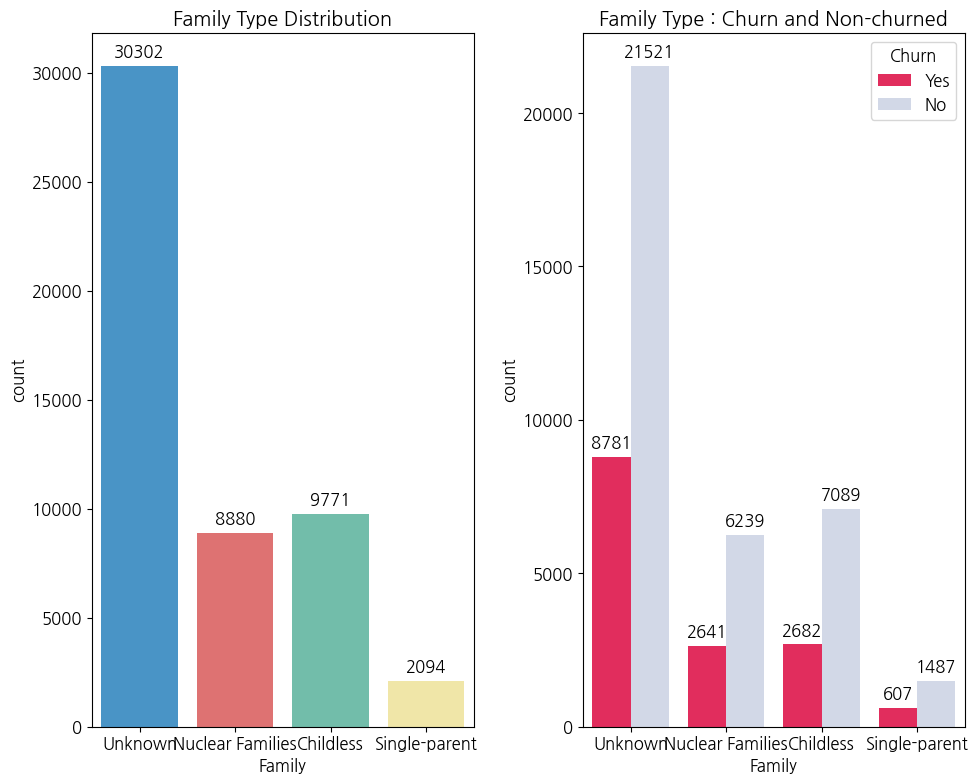

In [17]:
draw_count_plot(train,'Family Type Distribution', 'Family Type : Churn and Non-churned','Family','Family', 'Churn')

### 신규 고객

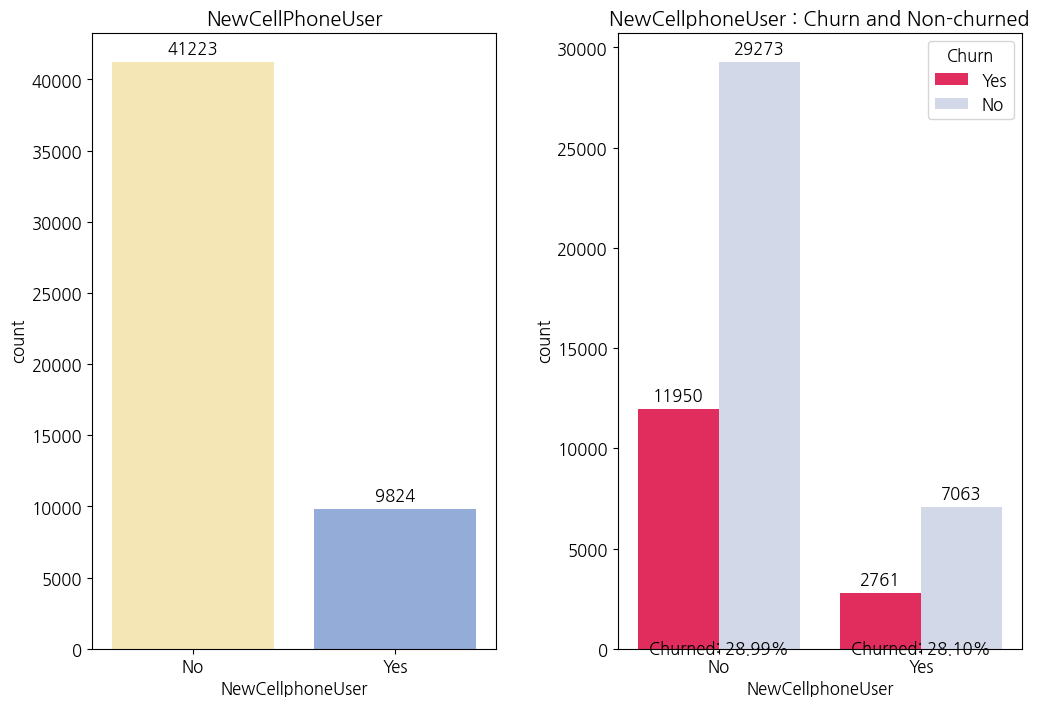

In [21]:
f, ax = plt.subplots(1,2, figsize=(12,8))
plt.subplots_adjust(wspace=0.3)

ax[0].set_title('NewCellPhoneUser')
sns.countplot(x='NewCellphoneUser', data=train, ax=ax[0], palette=['#ffecab', '#89aae3'])
for p in ax[0].patches: # 데이터 텍스트 표시  
    ax[0].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center',
                   va='center', xytext=(0, 10), textcoords='offset points') 

ax[1].set_title('NewCellphoneUser : Churn and Non-churned')
sns.countplot(x='NewCellphoneUser', data=train, hue='Churn', ax=ax[1], palette=['#ff0f4f', '#CED7EA'])
for p in ax[1].patches: # 데이터 텍스트 표시 
    ax[1].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center',
                   va='center', xytext=(0, 10), textcoords='offset points')

cond1 = (train['Churn'] == 'Yes') & (train['NewCellphoneUser'] == 'Yes')
cond2 = (train['Churn'] == 'Yes') & (train['NewCellphoneUser'] == 'No')

filtered_data_cond1 = train[cond1]
filtered_data_cond2 = train[cond2]

# 이탈 및 비이탈 고객 수 대비 백분율 계산
new_cell_churn = (len(filtered_data_cond1) / len(train[train['NewCellphoneUser'] == 'Yes'])) * 100
old_cell_churn = (len(filtered_data_cond2) / len(train[train['NewCellphoneUser'] == 'No'])) * 100

# 이탈 및 비이탈 고객 수를 그래프에 표시 (0.00%로 표시)
ax[1].text(0, old_cell_churn + 2, f'Churned: {old_cell_churn:.2f}%' if old_cell_churn > 0 else 'Churned: 0.00%', ha='center', va='center', fontsize=12)
ax[1].text(1, new_cell_churn + 2, f'Churned: {new_cell_churn:.2f}%' if new_cell_churn > 0 else 'Churned: 0.00%', ha='center', va='center', fontsize=12)
plt.rcParams['font.size'] = 12
plt.show()

### 신용카드 보유

* 신용카드를 보유한 고객의 이탈률이 더 높은 편이다.

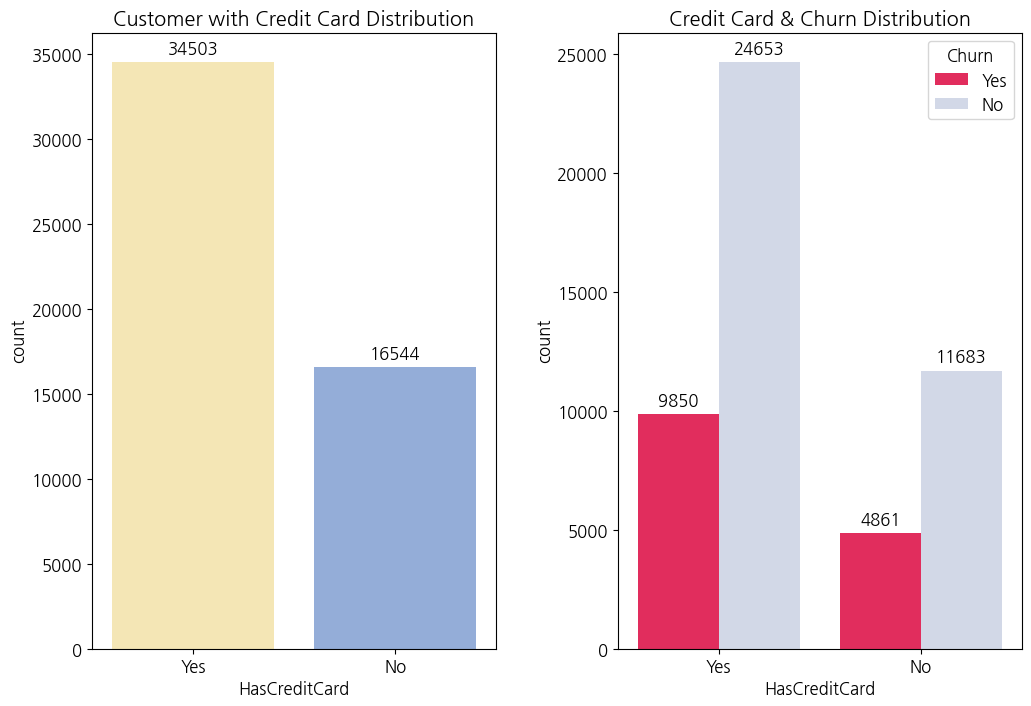

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# 새로운 그래프 생성
f, ax = plt.subplots(1, 2, figsize=(12, 8))
plt.subplots_adjust(wspace=0.3)

# 첫 번째 그래프: 신용카드 소지 여부에 따른 고객 분포
ax[0].set_title('Customer with Credit Card Distribution')
sns.countplot(x='HasCreditCard', data=train, ax=ax[0], palette=['#ffecab', '#89aae3'])
for p in ax[0].patches: 
    ax[0].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center',
                   va='center', xytext=(0, 10), textcoords='offset points') 

# 두 번째 그래프: 신용카드 소지 여부와 이탈 여부에 따른 분포
ax[1].set_title('Credit Card & Churn Distribution')
sns.countplot(x='HasCreditCard', data=train, hue='Churn', ax=ax[1], palette=['#ff0f4f', '#CED7EA'])
for p in ax[1].patches: 
    ax[1].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center',
                   va='center', xytext=(0, 10), textcoords='offset points')

plt.rcParams['font.size'] = 12
plt.show()


### 신용 등급

* 이탈 고객의 절반 이상이 신용 등급이 높다.(high, highest)

In [19]:
credit_percent = get_percent(train, 'CreditRating').sort_values(ascending=False)
credit_percent

2-High       37.2
1-Highest    16.7
3-Good       16.5
5-Low        12.7
4-Medium     10.5
7-Lowest      4.1
6-VeryLow     2.3
Name: CreditRating, dtype: float64

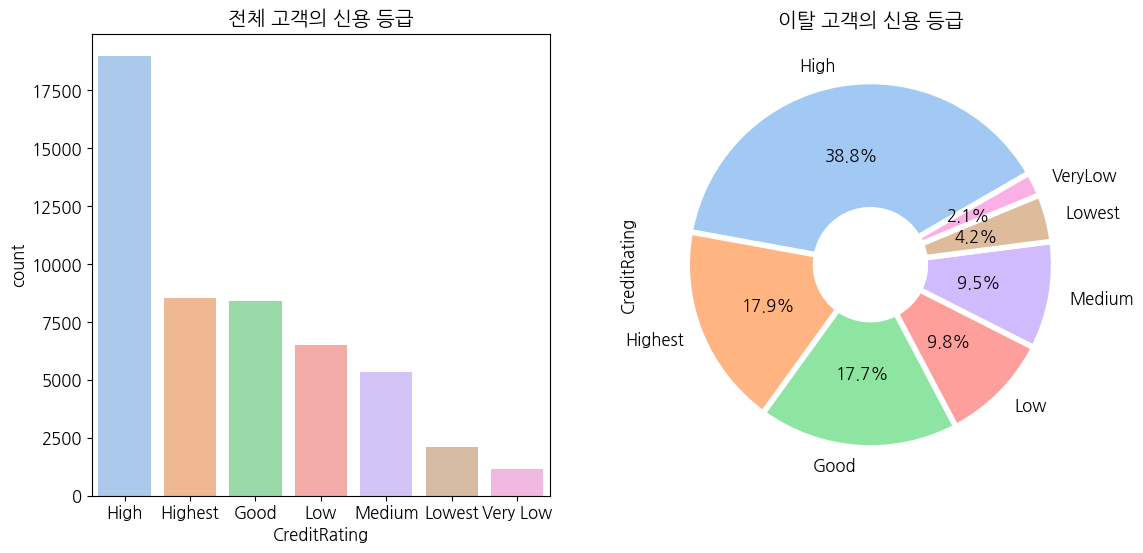

In [20]:
f,ax = plt.subplots(1,2, figsize=(13,6))
sns.set_palette("pastel")

sns.countplot(x='CreditRating', data=train, order = train['CreditRating'].value_counts().index, ax=ax[0])
ax[0].set_title('전체 고객의 신용 등급')
ax[0].set_xticklabels(['High', 'Highest', 'Good', 'Low', 'Medium', 'Lowest', 'Very Low'])

(get_percent(churn_y, 'CreditRating').sort_values(ascending=False)).plot.pie(
    autopct='%1.1f%%',
    labels=['High', 'Highest', 'Good', 'Low', 'Medium', 'Lowest', 'VeryLow'],
    startangle=30,
    ax=ax[1],
    wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 4},
    shadow=False
)
ax[1].set_title('이탈 고객의 신용 등급')

plt.show()

### 소득 계층

* 소득 수준을 0~9로 나누었을 때, 소득 계층이 0인 고객의 이탈률이 가장 높다.(이탈 고객의 26.4%, 미이탈 고객의 24.6%를 차지한다.)

In [21]:
income_percent = pd.concat([pivot_percent(churn_y, 'IncomeGroup'), pivot_percent(churn_n, 'IncomeGroup')], axis=1)
income_percent

Churn,Yes,No
IncomeGroup,,
0,26.4,24.6
1,4.0,4.0
2,2.4,2.3
3,5.3,6.1
4,7.6,8.1
5,8.2,8.4
6,18.5,18.9
7,11.9,11.4
8,4.9,5.2


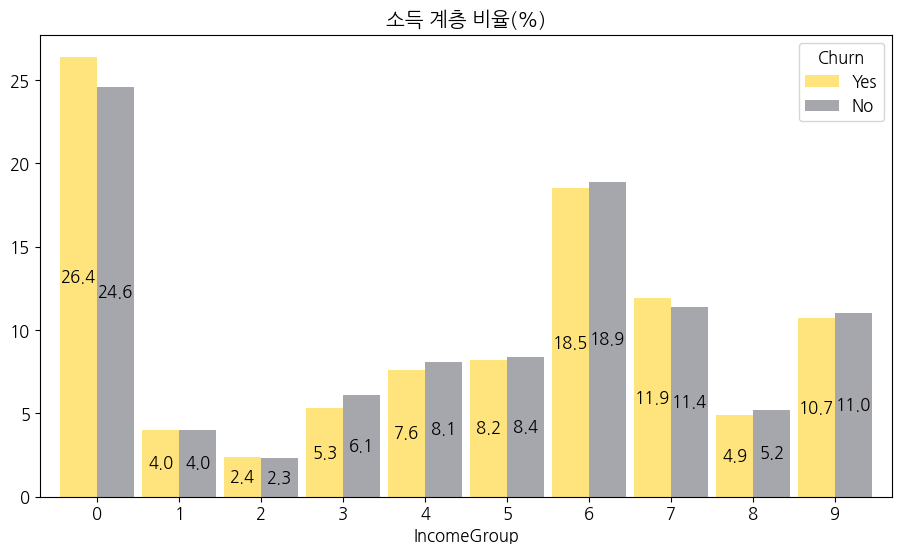

In [22]:
ax = income_percent.plot(kind="bar", figsize=(11,6), width=0.9,
                         color=['#ffe37d', '#a6a7ad'])

for c in ax.containers:
    labels = [ x.get_height() for x in c ]
    ax.bar_label(c, labels= np.round(labels, 1), label_type='center')
    
plt.rcParams['font.size'] = 12
plt.title('소득 계층 비율(%)')
plt.xticks(rotation=0)
plt.show()

### 나이


In [23]:
# age_category 생성
train['age_category'] = np.nan

In [24]:
def fill_age_category(num1, num2, groupName):
    train.loc[(train['Age'] >= num1) & (train['Age'] <= num2), "age_category"] = groupName
    
fill_age_category(0, 0, 'junior')
fill_age_category(9, 19, 'teenager')
fill_age_category(20, 29, 'twenties')
fill_age_category(30, 39, 'thirties')
fill_age_category(40, 49, 'forties')
fill_age_category(50, 59, 'fifties')
fill_age_category(60, 92, 'senior')

In [25]:
train['age_category'].value_counts()

junior      13917
forties      7918
thirties     7150
teenager     7087
twenties     6042
fifties      5648
senior       2375
Name: age_category, dtype: int64

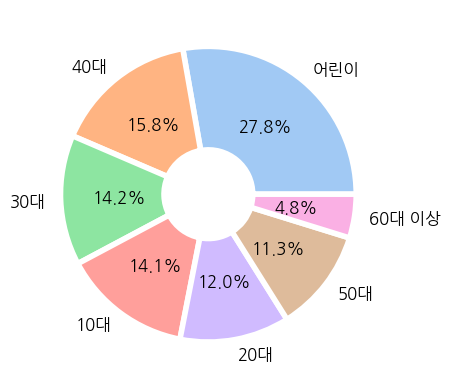

In [26]:
plt.pie(get_percent(train, 'age_category'), 
        autopct='%.1f%%',
        labels=['어린이', '40대', '30대', '10대', '20대', '50대', '60대 이상'],
        wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 4},
        colors=sns.set_palette("pastel"),
        shadow=False)

plt.show()

* 나이가 0으로 표시된 고객이 13,917명(27.8%) 이다.

In [27]:
# 나이가 0으로 표시된 고객 제외
age_except_zero = train[train['age_category'] != 'zero']

In [28]:
get_percent(age_except_zero, 'age_category')

junior      27.3
forties     15.5
thirties    14.0
teenager    13.9
twenties    11.8
fifties     11.1
senior       4.7
Name: age_category, dtype: float64

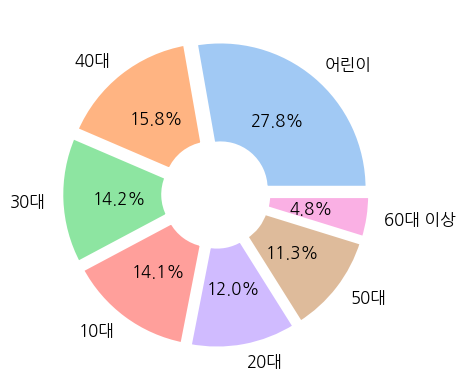

In [29]:
plt.pie(get_percent(age_except_zero, 'age_category'), 
        autopct='%.1f%%',
        labels=['어린이', '40대', '30대', '10대', '20대', '50대', '60대 이상'],
        explode=[0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05],
        wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 4},
        colors=sns.set_palette("pastel"),
        shadow=False)

plt.show()

* 9세부터 92세까지 다양한 연령대의 고객이 존재한다.
* 10대, 20대, 30대, 40대, 50대, 60대 이상으로 고객 연령대를 나누었다.
* 40대 고객이 가장 많고 30대도 많은 편이다.

### 서비스 이용 기간

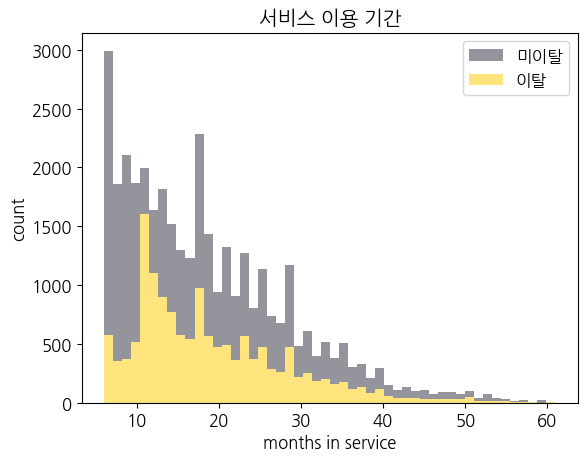

In [30]:
plt.hist((churn_y['MonthsInService'], churn_n['MonthsInService']), 
         bins=50, histtype='stepfilled', color=['#ffe37d','#94959c'])
plt.xlabel('months in service')
plt.ylabel('count')
plt.legend(['미이탈', '이탈'])
plt.title('서비스 이용 기간')
plt.show()

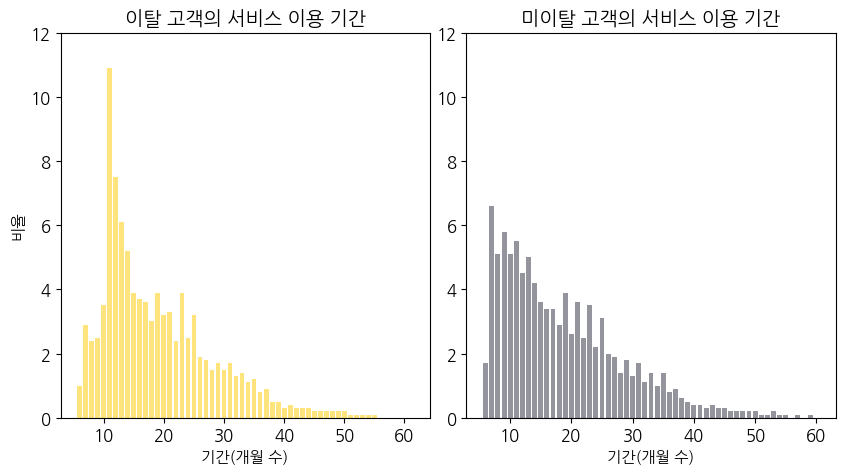

In [31]:
f, axes = plt.subplots(1,2)
f.set_size_inches((10,5))
plt.subplots_adjust(wspace=0.1)

axes[0].bar(get_percent(churn_y, 'MonthsInService').index, get_percent(churn_y, 'MonthsInService').values, color='#ffe37d')
axes[0].set_title('이탈 고객의 서비스 이용 기간', fontsize = 14)
axes[0].set_ylim([0,12])
axes[0].set_xlabel('기간(개월 수)', fontsize = 11)
axes[0].set_ylabel('비율', fontsize = 11)

axes[1].bar(get_percent(churn_n, 'MonthsInService').index, get_percent(churn_n, 'MonthsInService').values, color='#94959c')
axes[1].set_title('미이탈 고객의 서비스 이용 기간', fontsize = 14)
axes[1].set_xlabel('기간(개월 수)', fontsize = 11)
axes[1].set_ylim([0,12])
plt.show()

* 이탈 고객과 미이탈 고객의 서비스 이용 기간을 비율로 나타냈을 때, 이탈 고객의 이용 기간은 11개월이 10.9%로 가장 많았고 12개월은 7.5%, 13개월은 6.1%를 차지한다.
* 미이탈 고객의 서비스 이용 기간은 7개월이 6.6%로 가장 많았다.

### 월별 사용량

월별 이용 시간이 400분 미만인 고객: 전체 고객의 53%


<Axes: xlabel='Churn', ylabel='MonthlyMinutes'>

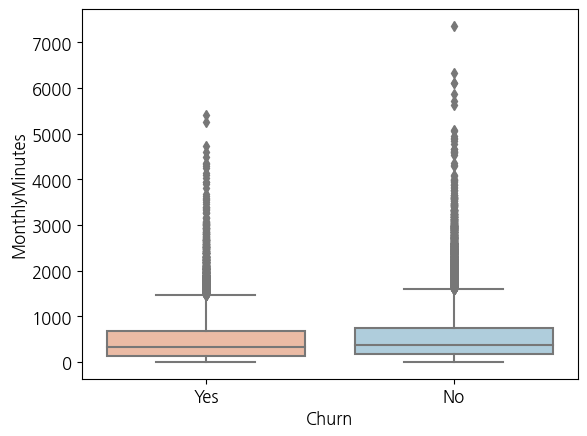

In [32]:
print('월별 이용 시간이 400분 미만인 고객: 전체 고객의 {}%'.format(round(len(train[train.MonthlyMinutes<400])/len(train)*100),1))
sns.boxplot(data=train, x="Churn", y="MonthlyMinutes", palette = "RdBu")

* 이상치가 많아서 뚜렷한 차이를 볼 수 없었다.

<Axes: xlabel='Churn', ylabel='MonthlyMinutes'>

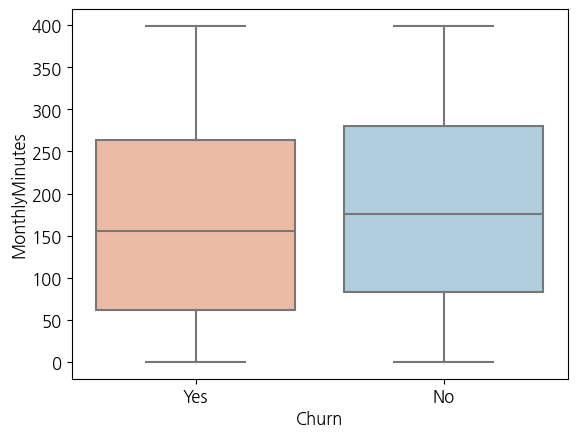

In [33]:
sns.boxplot(data=train[train.MonthlyMinutes<400], x="Churn", y="MonthlyMinutes", palette = "RdBu")

* 이용 시간이 400분 미만인 고객을 대상으로 box plot
* 미이탈 고객의 이용 시간이 이탈 고객보다 조금 더 많다.

### Total recurring charge

In [34]:
print('월별 요금이 60 미만인 고객: 전체 고객의 {}%'.format(round(len(train[train.TotalRecurringCharge<60])/len(train)*100),1))

월별 요금이 60 미만인 고객: 전체 고객의 73%


In [35]:
# 요금이 60 미만인 고객 이탈/미이탈로 구분하여 dataframe 생성
under60_y = churn_y[churn_y.TotalRecurringCharge<60]
under60_n = churn_n[churn_n.TotalRecurringCharge<60]

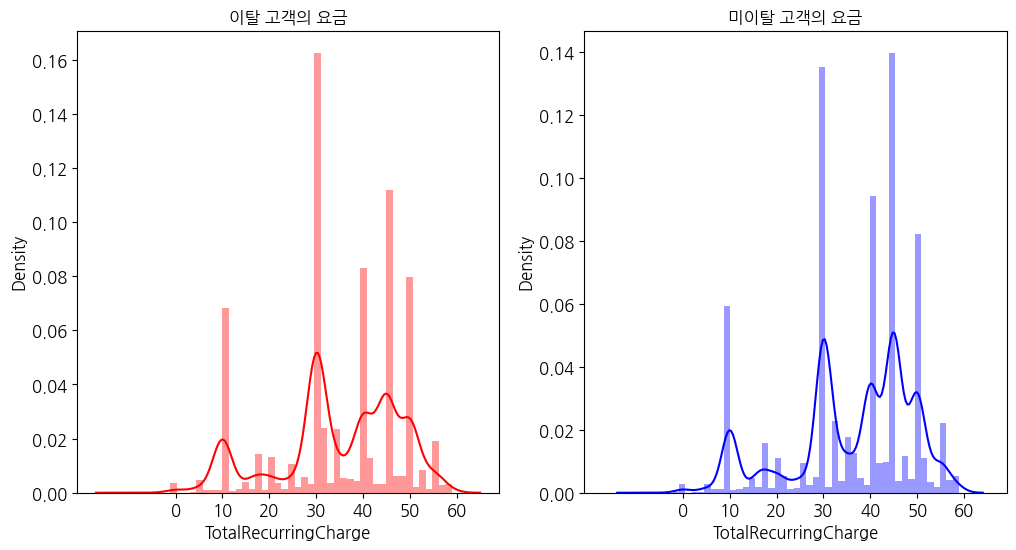

In [36]:
f, axes = plt.subplots(1, 2, figsize=(12, 6), sharex=True)

sns.distplot(under60_y['TotalRecurringCharge'], color="Red", ax=axes[0])
axes[0].set_title('이탈 고객의 요금', fontsize = 12)
axes[0].set_xticks([0, 10, 20, 30, 40, 50, 60])

sns.distplot(under60_n['TotalRecurringCharge'], color="Blue", ax=axes[1])
axes[1].set_title('미이탈 고객의 요금', fontsize = 12)

plt.show()

* 이탈 고객은 30달러 요금제를 가장 많이 사용한다.
* 미이탈 고객은 45달러, 30달러 요금제를 많이 사용한다.

### 현재 기기 사용 기간

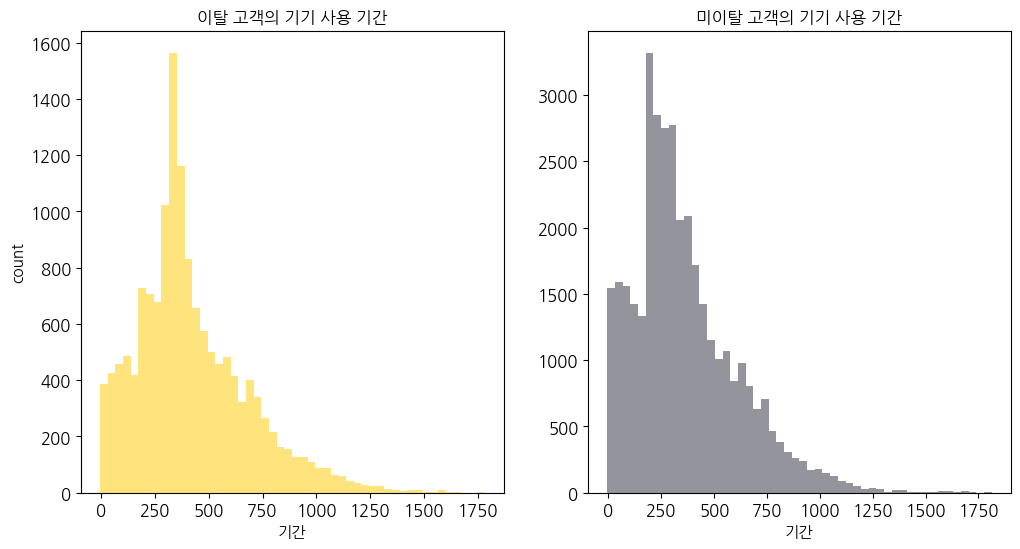

In [37]:
f, axes = plt.subplots(1,2)
f.set_size_inches((12,6))
plt.subplots_adjust(wspace=0.2)

axes[0].hist(churn_y['CurrentEquipmentDays'], color='#ffe37d', bins=50)
axes[0].set_title('이탈 고객의 기기 사용 기간', fontsize = 12)
axes[0].set_ylabel('count', fontsize = 11)
axes[0].set_xlabel('기간', fontsize = 11)

axes[1].hist(churn_n['CurrentEquipmentDays'], color='#94959c', bins=50)
axes[1].set_title('미이탈 고객의 기기 사용 기간', fontsize = 12)
axes[1].set_xlabel('기간', fontsize = 11)
plt.show()

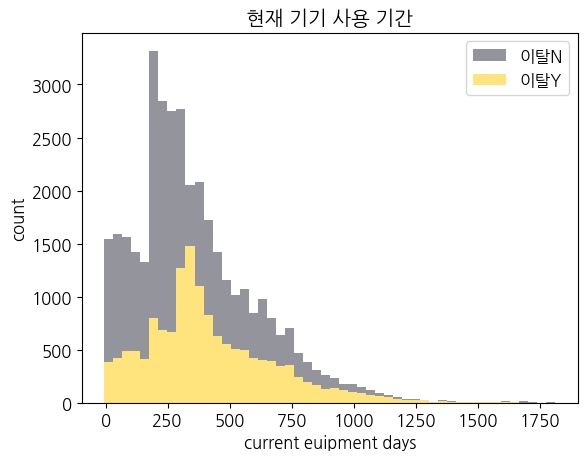

In [38]:
plt.hist((churn_y['CurrentEquipmentDays'], churn_n['CurrentEquipmentDays']), 
         bins=50, histtype='stepfilled', color=['#ffe37d','#94959c'])
plt.xlabel('current euipment days')
plt.ylabel('count')
plt.legend(['이탈N', '이탈Y'])
plt.title('현재 기기 사용 기간')
plt.show()

* 미이탈 고객의 기기 사용 기간이 짧은 쪽에 더 많이 분포되어 있다.

### 직업

In [39]:
occupation_percent = pd.concat([pivot_percent(churn_y, 'Occupation'), pivot_percent(churn_n, 'Occupation')], axis=1)
occupation_percent

Churn,Yes,No
Occupation,,
Clerical,2.0,1.9
Crafts,2.9,3.0
Homemaker,0.3,0.3
Other,74.3,73.5
Professional,16.8,17.3
Retired,1.3,1.5
Self,1.7,1.8
Student,0.8,0.7


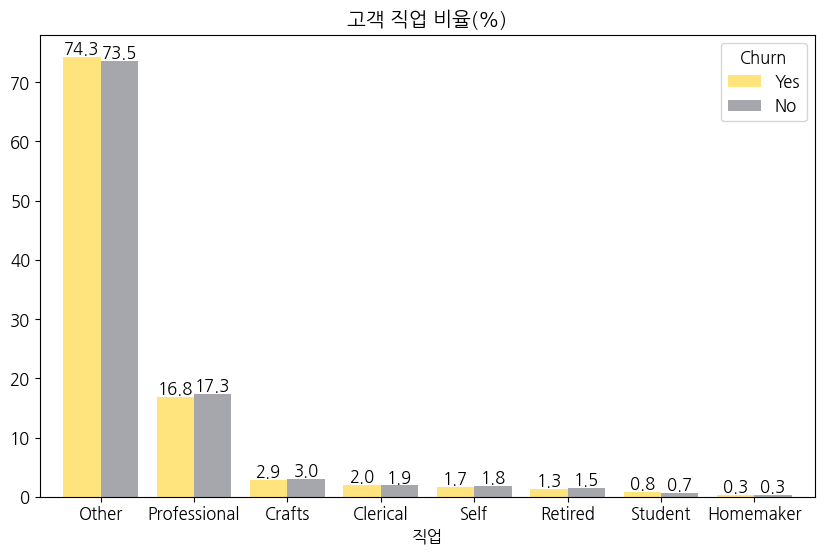

In [40]:
ax = occupation_percent.sort_values(by='Yes', ascending=False).plot(kind="bar",figsize=(10,6), width=0.8, color = ['#ffe37d','#a6a7ad'])

for c in ax.containers:
    labels = [ x.get_height() for x in c ]
    ax.bar_label(c, labels= np.round(labels,1), label_type='edge')

plt.rcParams['font.size'] = 12
plt.title('고객 직업 비율(%)')
plt.xticks(rotation=0)
plt.xlabel("직업")
plt.show()

* 직업이 명시되지 않은 고객이 70% 이상이다.
* 사무직, 공예원, 주부, 전문직, 퇴직, 자영업, 학생, 기타 등의 직업으로 나눠졌다.
* 기타를 제외하고 전문직의 이탈률이 가장 높았다.

### BlockedCalls(차단 전화)

In [41]:
train.BlockedCalls.describe()

count    51047.000000
mean         4.085672
std         10.946905
min          0.000000
25%          0.000000
50%          1.000000
75%          3.700000
max        384.300000
Name: BlockedCalls, dtype: float64

차단 전화 건수가 5건 미만인 고객: 전체 고객의 80%


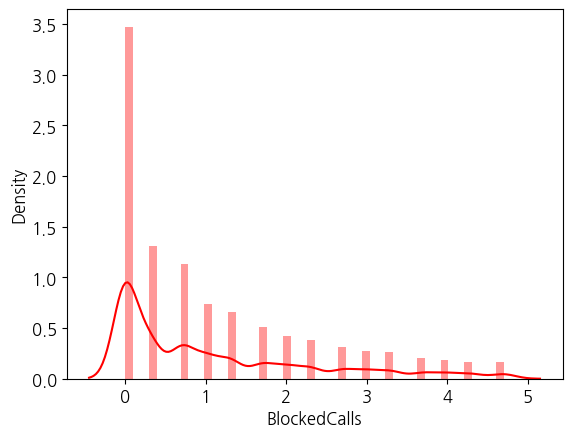

In [42]:
print('차단 전화 건수가 5건 미만인 고객: 전체 고객의 {}%'.format(round(len(train[train.BlockedCalls<5])/len(train)*100),1))
ax = sns.distplot(train[train['BlockedCalls']<5].BlockedCalls, color="Red")

### ReceivedCalls(수신 전화)

In [43]:
train.ReceivedCalls.describe()

count    51047.000000
mean       114.800121
std        166.485896
min          0.000000
25%          8.300000
50%         52.800000
75%        153.500000
max       2692.400000
Name: ReceivedCalls, dtype: float64

수신 전화 건수가 150건 미만인 고객: 전체 고객의 74%


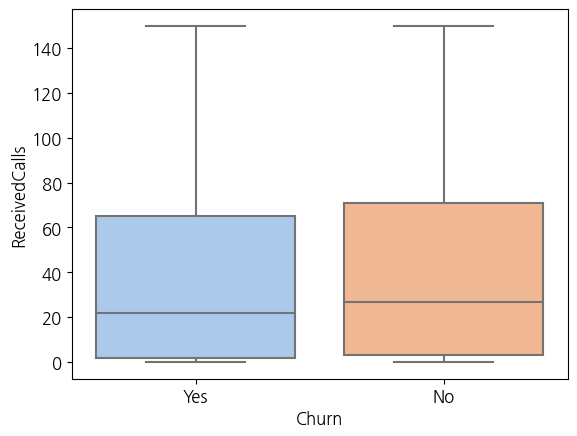

In [44]:
print('수신 전화 건수가 150건 미만인 고객: 전체 고객의 {}%'.format(round(len(train[train.ReceivedCalls<150])/len(train)*100),1))
sns.boxplot(x='Churn', y='ReceivedCalls', data=train[train['ReceivedCalls']<150]);

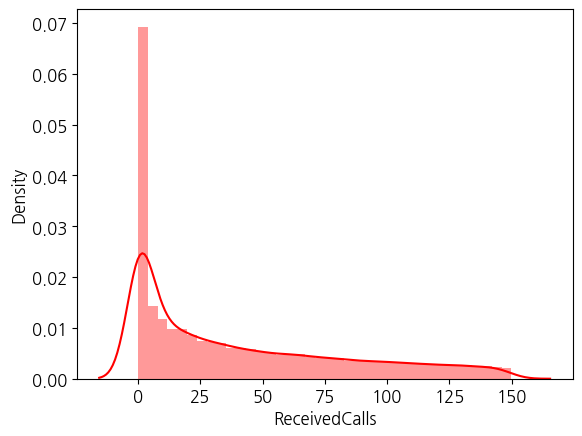

In [45]:
ax = sns.distplot(train[train['ReceivedCalls']<150].ReceivedCalls, color="Red")

### OverageMinutes(요금제 초과 사용 시간)

In [46]:
train.OverageMinutes.describe()

count    50891.000000
mean        40.027785
std         96.588076
min          0.000000
25%          0.000000
50%          3.000000
75%         41.000000
max       4321.000000
Name: OverageMinutes, dtype: float64

요금제 초과 사용 시간이 40분 미만인 고객: 전체 고객의 74%


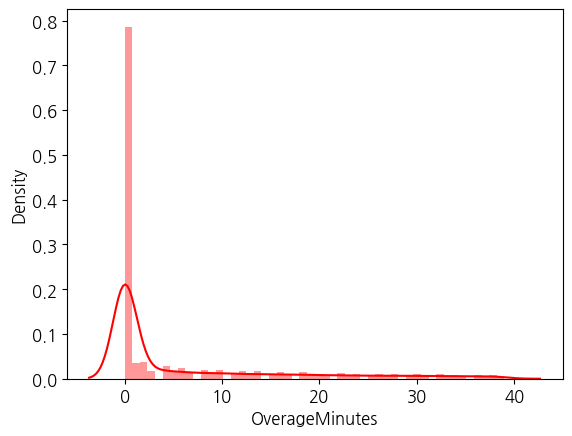

In [47]:
print('요금제 초과 사용 시간이 40분 미만인 고객: 전체 고객의 {}%'.format(round(len(train[train.OverageMinutes<40])/len(train)*100),1))
ax = sns.distplot(train[train['OverageMinutes']<40].OverageMinutes, color="Red")

### CustomerCareCalls(서비스센터 → 고객 전화 수)

In [48]:
train.CustomerCareCalls.describe()

count    51047.000000
mean         1.868999
std          5.096138
min          0.000000
25%          0.000000
50%          0.000000
75%          1.700000
max        327.300000
Name: CustomerCareCalls, dtype: float64

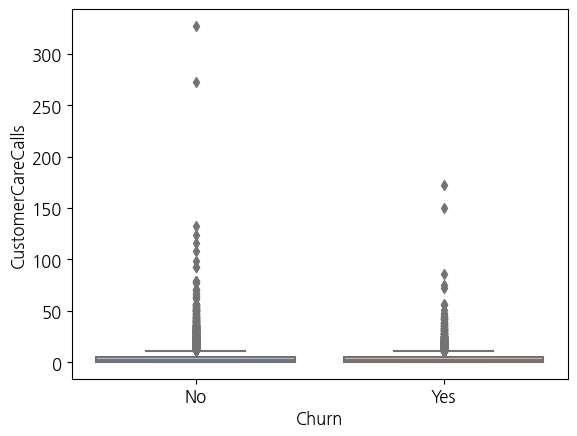

In [49]:
sns.boxplot(x='Churn', y='CustomerCareCalls', data=train[train['CustomerCareCalls']>0]);

In [50]:
train[train['CustomerCareCalls']>200]

,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus,Family,Age,count,age_category
10503,No,77.78,1702.0,68.0,0.0,6.0,0.0,-427.0,-1.1,24.7,163.7,184.7,327.3,7.3,683.2,55.0,28.0,308.7,426.3,188.3,0.0,11.7,24,1,1,4.0,2.0,330.0,No,No,Yes,Yes,Yes,Known,No,No,No,No,No,Yes,0,0,No,No,1,2,No,1,30,No,2-High,Suburban,Other,No,Unknown,26.0,1,twenties
40077,No,107.41,490.0,30.0,0.0,98.0,0.0,404.0,-4.4,9.0,30.0,12.0,273.0,0.0,63.6,11.7,1.0,102.7,112.7,142.7,0.0,0.3,9,1,1,2.0,1.0,75.0,No,No,Yes,No,No,Unknown,No,No,No,No,No,No,0,0,Yes,No,0,3,No,0,80,No,5-Low,Rural,Other,Unknown,Unknown,0.0,1,junior


* 최대값이 327이다. 서비스센터에서 고객에게 327건이나 전화를 한 이유는 알 수 없다.
* 서비스센터에서 200건 이상 전화를 받은 고객 2명 모두 미이탈 고객이다.

### MadeCallToRetentionTeam(고객 → 서비스센터 전화 Y/N)

In [51]:
# 전체 고객 중 서비스 센터에 전화한 사람의 비율
get_percent(train, 'MadeCallToRetentionTeam')

No     96.6
Yes     3.4
Name: MadeCallToRetentionTeam, dtype: float64

In [52]:
# 이탈 여부별로 서비스 센터에 전화한 사람의 비율
pd.concat([pivot_percent(churn_n, 'MadeCallToRetentionTeam'), pivot_percent(churn_y, 'MadeCallToRetentionTeam')], axis=1)

Churn,No,Yes
MadeCallToRetentionTeam,,
No,97.4,94.7
Yes,2.6,5.3


### RetentionCalls(고객 → 서비스센터 전화 수)

In [53]:
train.RetentionCalls.value_counts()

0    49302
1     1609
2      120
3       14
4        2
Name: RetentionCalls, dtype: int64

* 고객이 서비스 센터에 전화를 하지 않는 경우가 많다.(49,302명)
* 전화를 하더라도 고객의 불만 사항 때문이지 않을까?
* 서비스 센터에 전화를 한 고객은 소수이지만, 분석이 필요해 보인다.

In [54]:
train[train['RetentionCalls']==4]

,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus,Family,Age,count,age_category
2158,Yes,51.42,267.0,40.0,0.99,35.0,0.6,-265.0,-20.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36,4,1,9.0,3.0,59.0,No,Yes,Yes,No,No,Unknown,No,No,No,No,No,No,4,2,No,No,0,0,No,0,10,Yes,1-Highest,Suburban,Other,Unknown,Unknown,0.0,1,junior
5813,Yes,83.53,287.0,30.0,1.24,168.0,0.0,84.0,-11.2,18.7,3.7,35.7,1.7,0.0,27.9,20.0,1.0,98.7,49.7,22.3,0.0,0.7,31,1,1,3.0,2.0,745.0,No,No,Yes,No,No,Unknown,No,No,No,No,No,No,4,3,No,Yes,0,0,No,0,10,Yes,3-Good,Town,Other,Unknown,Unknown,0.0,1,junior


* 이유는 알 수 없지만, 서비스 센터에 4건 전화한 고객 2명 모두 이탈 고객이다.

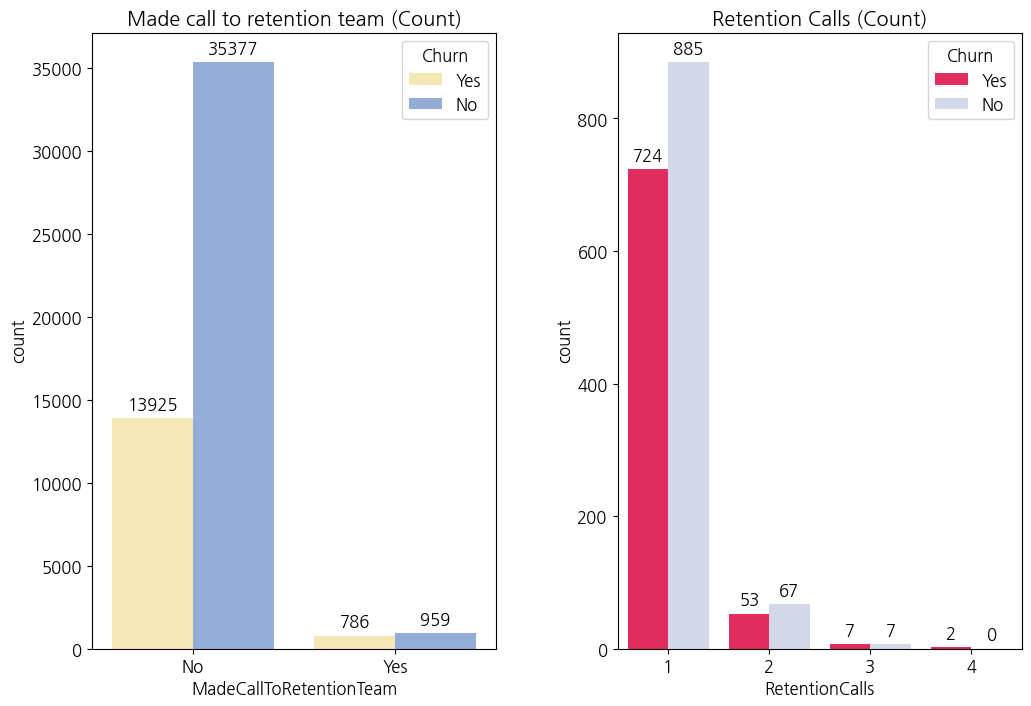

In [55]:
f, ax = plt.subplots(1,2, figsize=(12,8))
plt.subplots_adjust(wspace=0.3)

ax[0].set_title('Made call to retention team (Count)')
order = ['No', 'Yes']
sns.countplot(x='MadeCallToRetentionTeam', hue='Churn', data=train, ax=ax[0], order=order, palette=['#ffecab', '#89aae3'])

for p in ax[0].patches: # 데이터 텍스트 표시  
    ax[0].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center',
                   va='center', xytext=(0, 10), textcoords='offset points') 

ax[1].set_title('Retention Calls (Count)')
sns.countplot(x='RetentionCalls', data=train[train['RetentionCalls']>0], hue='Churn', ax=ax[1], palette=['#ff0f4f', '#CED7EA'])

for p in ax[1].patches: # 데이터 텍스트 표시 
    ax[1].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center',
                   va='center', xytext=(0, 10), textcoords='offset points')

plt.rcParams['font.size'] = 12
plt.show()

* 전체 고객중에 1,745명(3.4%)이 서비스 센터에 전화를 했다.
* 이탈 여부로 나누어 보면 서비스 센터에 전화를 한 고객은 이탈 고객의 5.3%, 미이탈 고객의 2.6%를 차지한다.

In [56]:
print('서비스 센터에 전화를 걸었던 고객들로부터 얻는 수익: {}'.format(round(train[train['MadeCallToRetentionTeam'] == 'Yes'].MonthlyRevenue.sum())))

서비스 센터에 전화를 걸었던 고객들로부터 얻는 수익: 106719


In [57]:
loss = train[train['MadeCallToRetentionTeam'] == 'Yes'].MonthlyRevenue.sum() / train.MonthlyRevenue.sum() * 100
print('서비스 센터에 전화를 걸었던 고객이 모두 이탈하는 경우, 전체 수익의 {}% 감소'.format(round(loss, 1)))

서비스 센터에 전화를 걸었던 고객이 모두 이탈하는 경우, 전체 수익의 3.6% 감소


* 만약 서비스 센터에 전화를 걸었던 고객이 모두 이탈하는 경우, 한달 수익의 3.6%가 감소하게 된다.

### 상관관계 확인

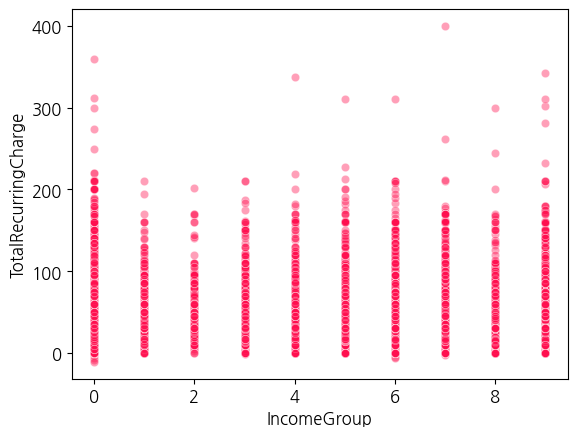

In [58]:
sns.scatterplot(data=train, x='IncomeGroup', y='TotalRecurringCharge', c='#ff0f4f', alpha=0.4);

* 소득 계층과 요금은 관련이 없어 보인다.

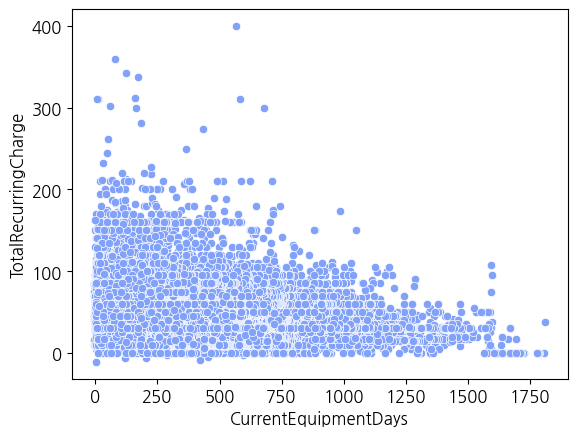

In [59]:
sns.scatterplot(data=train, x='CurrentEquipmentDays', y='TotalRecurringCharge', color='#82a2fa');

* 기기를 사용하는 기간이 길어질수록 요금이 낮아지는 경향을 보인다.

## 데이터 모델링 / 학습 / 예측

In [60]:
df = pd.read_csv('./data/cell2celltrain.csv', index_col='CustomerID')
df_test = pd.read_csv('./data/cell2cellholdout.csv', index_col='CustomerID')
results_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Specificity', 'roc'])
print(df.shape)
df

(51047, 57)


,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,6.3,0.0,0.0,97.2,0.0,0.0,58.0,24.0,1.3,0.0,0.3,61,2,1,SEAPOR503,2.0,2.0,361.0,62.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,1,0,No,No,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,0.0,2.7,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.3,0.0,0.0,58,1,1,PITHOM412,2.0,1.0,1504.0,40.0,42.0,Yes,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,Yes,No,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.3,0.0,1.3,3.7,0.0,0.0,0.0,60,1,1,MILMIL414,1.0,1.0,1812.0,26.0,26.0,Yes,No,No,No,No,Unknown,No,No,No,No,No,Yes,0,0,Yes,No,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,7.7,76.0,4.3,1.3,200.3,370.3,147.0,555.7,303.7,59.7,0.0,22.7,59,2,2,PITHOM412,9.0,4.0,458.0,30.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,Yes,No,0,6,No,0,10,No,4-Medium,Other,Other,No
3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,2,2,OKCTUL918,4.0,3.0,852.0,46.0,54.0,No,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,No,Yes,0,9,No,1,10,No,1-Highest,Other,Professional,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3399958,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.3,2.7,48.3,0.0,0.0,58.9,17.0,1.3,160.3,33.3,12.0,0.0,0.3,29,1,1,LAXSFN818,2.0,2.0,526.0,68.0,64.0,No,Yes,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,No,No,0,6,No,0,60,No,1-Highest,Suburban,Other,Yes
3399974,No,95.17,1745.0,85.0,0.99,45.0,4.7,122.0,15.9,16.7,0.7,41.3,0.0,0.0,681.5,89.7,33.3,318.7,248.3,17.3,0.0,14.3,29,1,1,LAXCDG310,2.0,2.0,464.0,48.0,48.0,Yes,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,No,No,0,9,No,1,60,No,3-Good,Other,Other,No
3399978,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.7,4.3,287.0,1.3,13.7,1225.3,430.3,87.7,1359.0,910.3,76.0,0.0,6.7,25,1,1,LAXCDG310,3.0,2.0,378.0,36.0,0.0,No,No,Yes,No,No,Known,No,No,No,No,No,Yes,0,0,No,No,0,7,No,1,80,No,5-Low,Other,Clerical,No


In [61]:
# Unknown으로 들어간 데이터들이 있음. Unknown을 None(Null)으로 변경
# 신용등급은 숫자-평가 형태로 들어있음. 숫자로만 변경. 없으면 None 처리.
# HandsetPrice 데이터는 가짓수가 많은 것으로 보아 이산형 변수는 아닌거 같음. 연속형 변수로 형태 변환(float64)
def cleanup(df):
    df = df.replace('Unknown', np.nan)
    
    df['CreditRating'] = df['CreditRating'].apply(lambda x: int(x.split('-')[0]) if x else np.nan)
    df['HandsetPrice'] = df['HandsetPrice'].astype('float')
    
    return df

df = cleanup(df)
df_test = cleanup(df_test)
df.head()


,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,6.3,0.0,0.0,97.2,0.0,0.0,58.0,24.0,1.3,0.0,0.3,61,2,1,SEAPOR503,2.0,2.0,361.0,62.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,1,0,No,No,0,4,No,0,30.0,Yes,1,Suburban,Professional,No
3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,0.0,2.7,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.3,0.0,0.0,58,1,1,PITHOM412,2.0,1.0,1504.0,40.0,42.0,Yes,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,Yes,No,0,5,No,0,30.0,No,4,Suburban,Professional,Yes
3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.3,0.0,1.3,3.7,0.0,0.0,0.0,60,1,1,MILMIL414,1.0,1.0,1812.0,26.0,26.0,Yes,No,No,No,No,NaN,No,No,No,No,No,Yes,0,0,Yes,No,0,6,No,0,NaN,No,3,Town,Crafts,Yes
3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,7.7,76.0,4.3,1.3,200.3,370.3,147.0,555.7,303.7,59.7,0.0,22.7,59,2,2,PITHOM412,9.0,4.0,458.0,30.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,Yes,No,0,6,No,0,10.0,No,4,Other,Other,No
3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,2,2,OKCTUL918,4.0,3.0,852.0,46.0,54.0,No,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,No,Yes,0,9,No,1,10.0,No,1,Other,Professional,Yes


In [62]:
df.isnull().sum().sort_values(ascending=False)

HandsetPrice                 28982
MaritalStatus                19700
Homeownership                17060
AgeHH2                         909
AgeHH1                         909
PercChangeMinutes              367
PercChangeRevenues             367
MonthlyMinutes                 156
TotalRecurringCharge           156
DirectorAssistedCalls          156
OverageMinutes                 156
RoamingCalls                   156
MonthlyRevenue                 156
ServiceArea                     24
HandsetModels                    1
Handsets                         1
CurrentEquipmentDays             1
PeakCallsInOut                   0
OffPeakCallsInOut                0
OptOutMailings                   0
NonUSTravel                      0
OwnsComputer                     0
HasCreditCard                    0
RetentionCalls                   0
RetentionOffersAccepted          0
NewCellphoneUser                 0
NotNewCellphoneUser              0
ReferralsMadeBySubscriber        0
IncomeGroup         

In [63]:
# AgeHH1, AgeHH2 컬럼을 Age로 대체(평균)
df['Age'] = (df['AgeHH1'] + df['AgeHH2']) / 2
df_test['Age'] = (df_test['AgeHH1'] + df_test['AgeHH2']) / 2
df.drop(['AgeHH1', 'AgeHH2'], axis=1, inplace=True)
df_test.drop(['AgeHH1', 'AgeHH2'], axis=1, inplace=True)

# family 컬럼 생성
family_type = df.apply(lambda row: 'Nuclear Families' if (row['ChildrenInHH'] == 'Yes') & (row['MaritalStatus'] == 'Yes') else 'Childless' if (row['ChildrenInHH'] == 'No') & (row['MaritalStatus'] == 'Yes') else 'Single-parent' if (row['ChildrenInHH'] == 'Yes') & (row['MaritalStatus'] == 'No') else 'Unknown' if pd.isnull(row['ChildrenInHH']) or pd.isnull(row['MaritalStatus']) else 'Unknown', axis=1)
df['Family'] = family_type

family_type = df_test.apply(lambda row: 'Nuclear Families' if (row['ChildrenInHH'] == 'Yes') & (row['MaritalStatus'] == 'Yes') else 'Childless' if (row['ChildrenInHH'] == 'No') & (row['MaritalStatus'] == 'Yes') else 'Single-parent' if (row['ChildrenInHH'] == 'Yes') & (row['MaritalStatus'] == 'No') else 'Unknown' if pd.isnull(row['ChildrenInHH']) or pd.isnull(row['MaritalStatus']) else 'Unknown', axis=1)
df_test['Family'] = family_type

# df.drop('MaritalStatus', axis=1, inplace=True)
# df_test.drop('MaritalStatus', axis=1, inplace=True)

In [64]:
df[['Age','MaritalStatus', 'ChildrenInHH', 'Family']]

,Age,MaritalStatus,ChildrenInHH,Family
CustomerID,,,,
3000002,31.0,No,No,Unknown
3000010,41.0,Yes,Yes,Nuclear Families
3000014,26.0,Yes,Yes,Nuclear Families
3000022,15.0,No,No,Unknown
3000026,50.0,Yes,No,Childless
...,...,...,...,...
3399958,66.0,Yes,No,Childless
3399974,48.0,No,Yes,Single-parent
3399978,18.0,No,No,Unknown


In [65]:
# 컬럼 데이터타입 별 갯수 확인
df.dtypes.value_counts()

float64    26
object     22
int64       9
dtype: int64

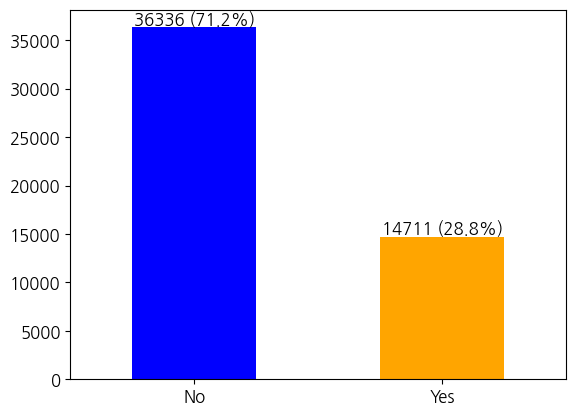

In [66]:
value_counts = df['Churn'].value_counts()

# 막대 그래프 그리기
ax = value_counts.plot(kind='bar', color=['blue', 'orange'])

# 각 값의 카운트를 막대 위에 표시
def autolabel_percent(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2, height,
                f'{height} ({height / value_counts.sum() * 100:.1f}%)',
                ha='center', va='bottom')

autolabel_percent(ax.patches)

plt.xticks(rotation=360)
# 그래프 출력
plt.show()

<Axes: xlabel='Churn', ylabel='count'>

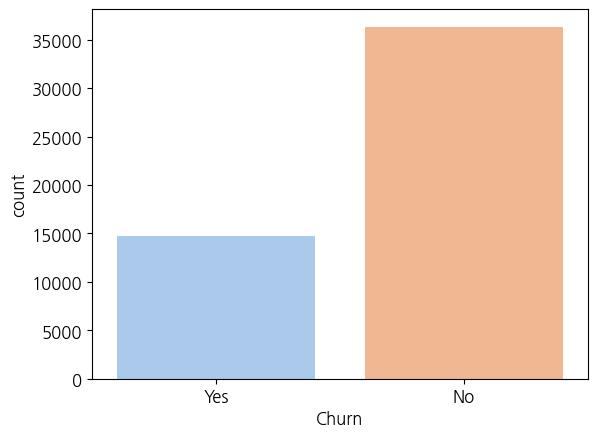

In [67]:
sns.countplot(x=df.Churn)

#### 이탈 여부 중 Yes는 약 30%, No는 약 70%임을 알 수 있음.
#### 데이터의 불균형이 심하므로, 모델을 학습할 때 imbalanced-learn 라이브러리를 사용하여 불균형을 해소해보려함.
#### 해당 라이브러리는 각 범주가 차지하는 비율을 조정하여 데이터를 샘플링해서 성능을 조절하는 라이브러리임.

## 각 컬럼별 상관여부 파악
### Numeric 데이터들의 분포 확인

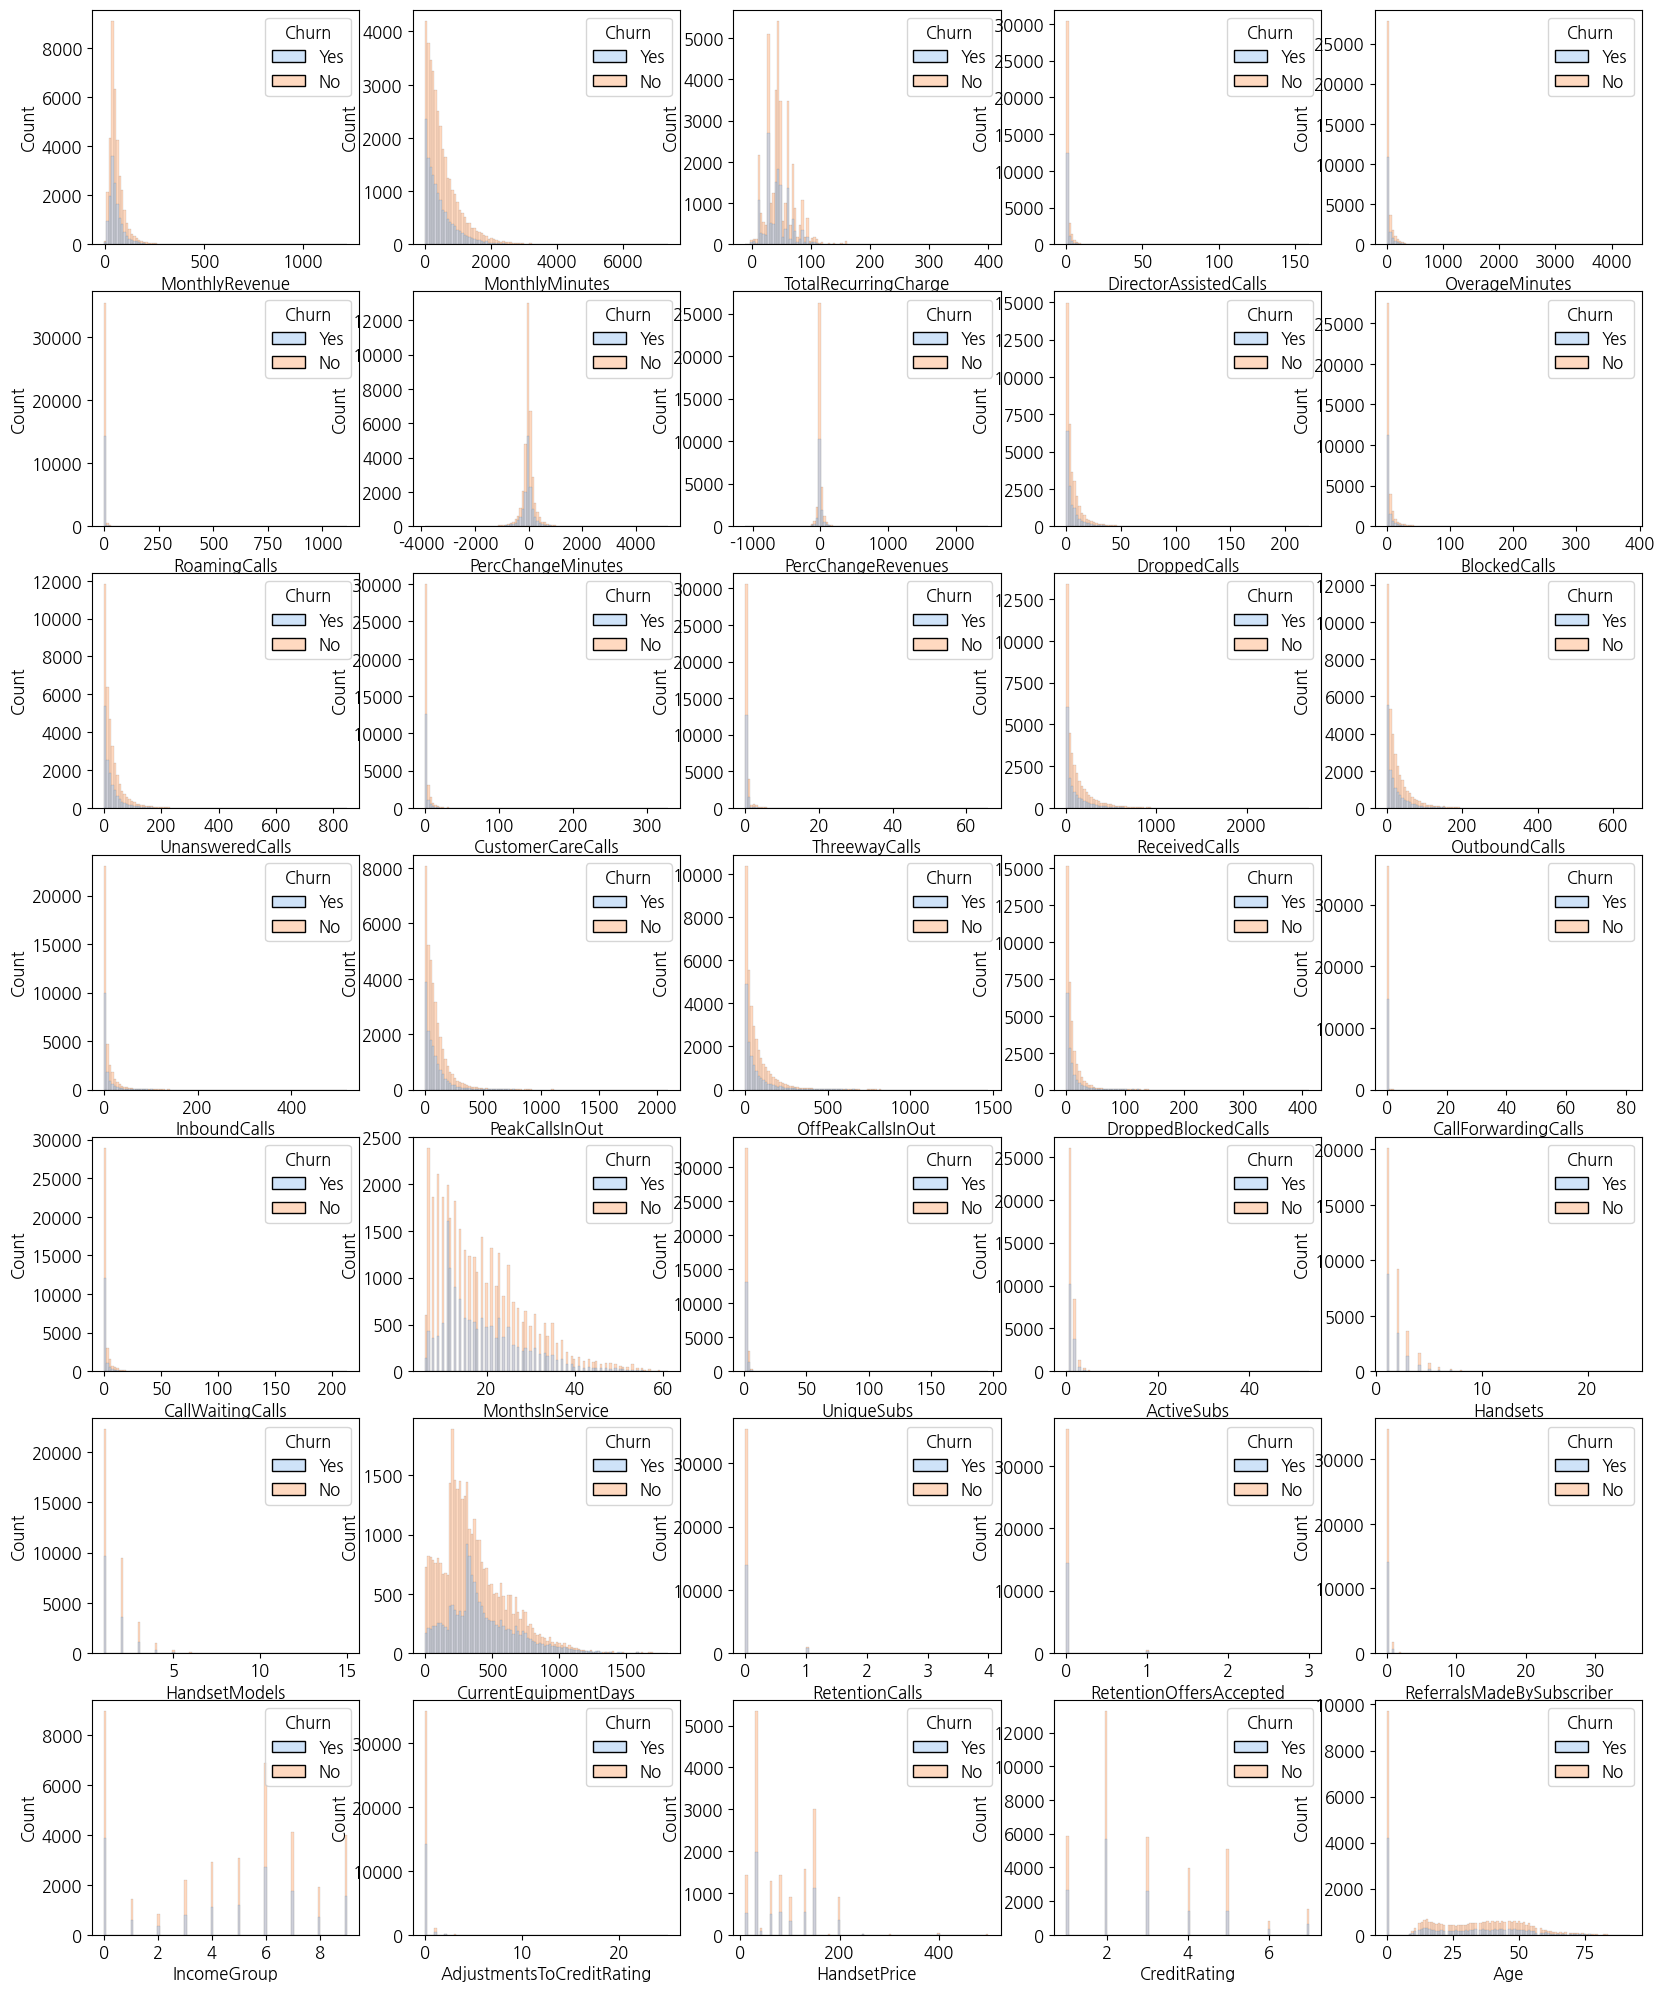

In [68]:
plots_per_row = 5

number_of_plots = df.select_dtypes(exclude=['object']).shape[-1]

fig, axes = plt.subplots((number_of_plots//plots_per_row) + (number_of_plots % 5 != 0), plots_per_row)

axes = axes.flatten()

count = 0
for index, col in df.select_dtypes(exclude=['object']).columns.to_series().items():
    a = sns.histplot(data=df, x=col, hue="Churn", ax=axes[count], kde=False, bins=100)
    count += 1
    
for i in range(1, len(axes) - number_of_plots + 1):
    fig.delaxes(axes[-i]) # 빈 subplot은 삭제
    
fig.set_figwidth(20)
fig.set_figheight(25)
plt.show()

### 이산형 데이터들의 분포 확인

In [69]:
# unique: 번호 가짓수
# top: 최빈 데이터
df.select_dtypes(include=['object']).describe()

,Churn,ServiceArea,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,NewCellphoneUser,NotNewCellphoneUser,OwnsMotorcycle,MadeCallToRetentionTeam,PrizmCode,Occupation,MaritalStatus,Family
count,51047,51023,51047,51047,51047,51047,51047,33987,51047,51047,51047,51047,51047,51047,51047,51047,51047,51047,51047,51047,31347,51047
unique,2,747,2,2,2,2,2,1,2,2,2,2,2,2,2,2,2,2,4,8,2,4
top,No,NYCBRO917,No,No,Yes,No,No,Known,No,No,No,No,No,Yes,No,No,No,No,Other,Other,Yes,Unknown
freq,36336,1684,38679,43956,46046,41524,46894,33987,32596,31821,50295,48168,41583,34503,41223,44012,50368,49302,24655,37637,18651,30302


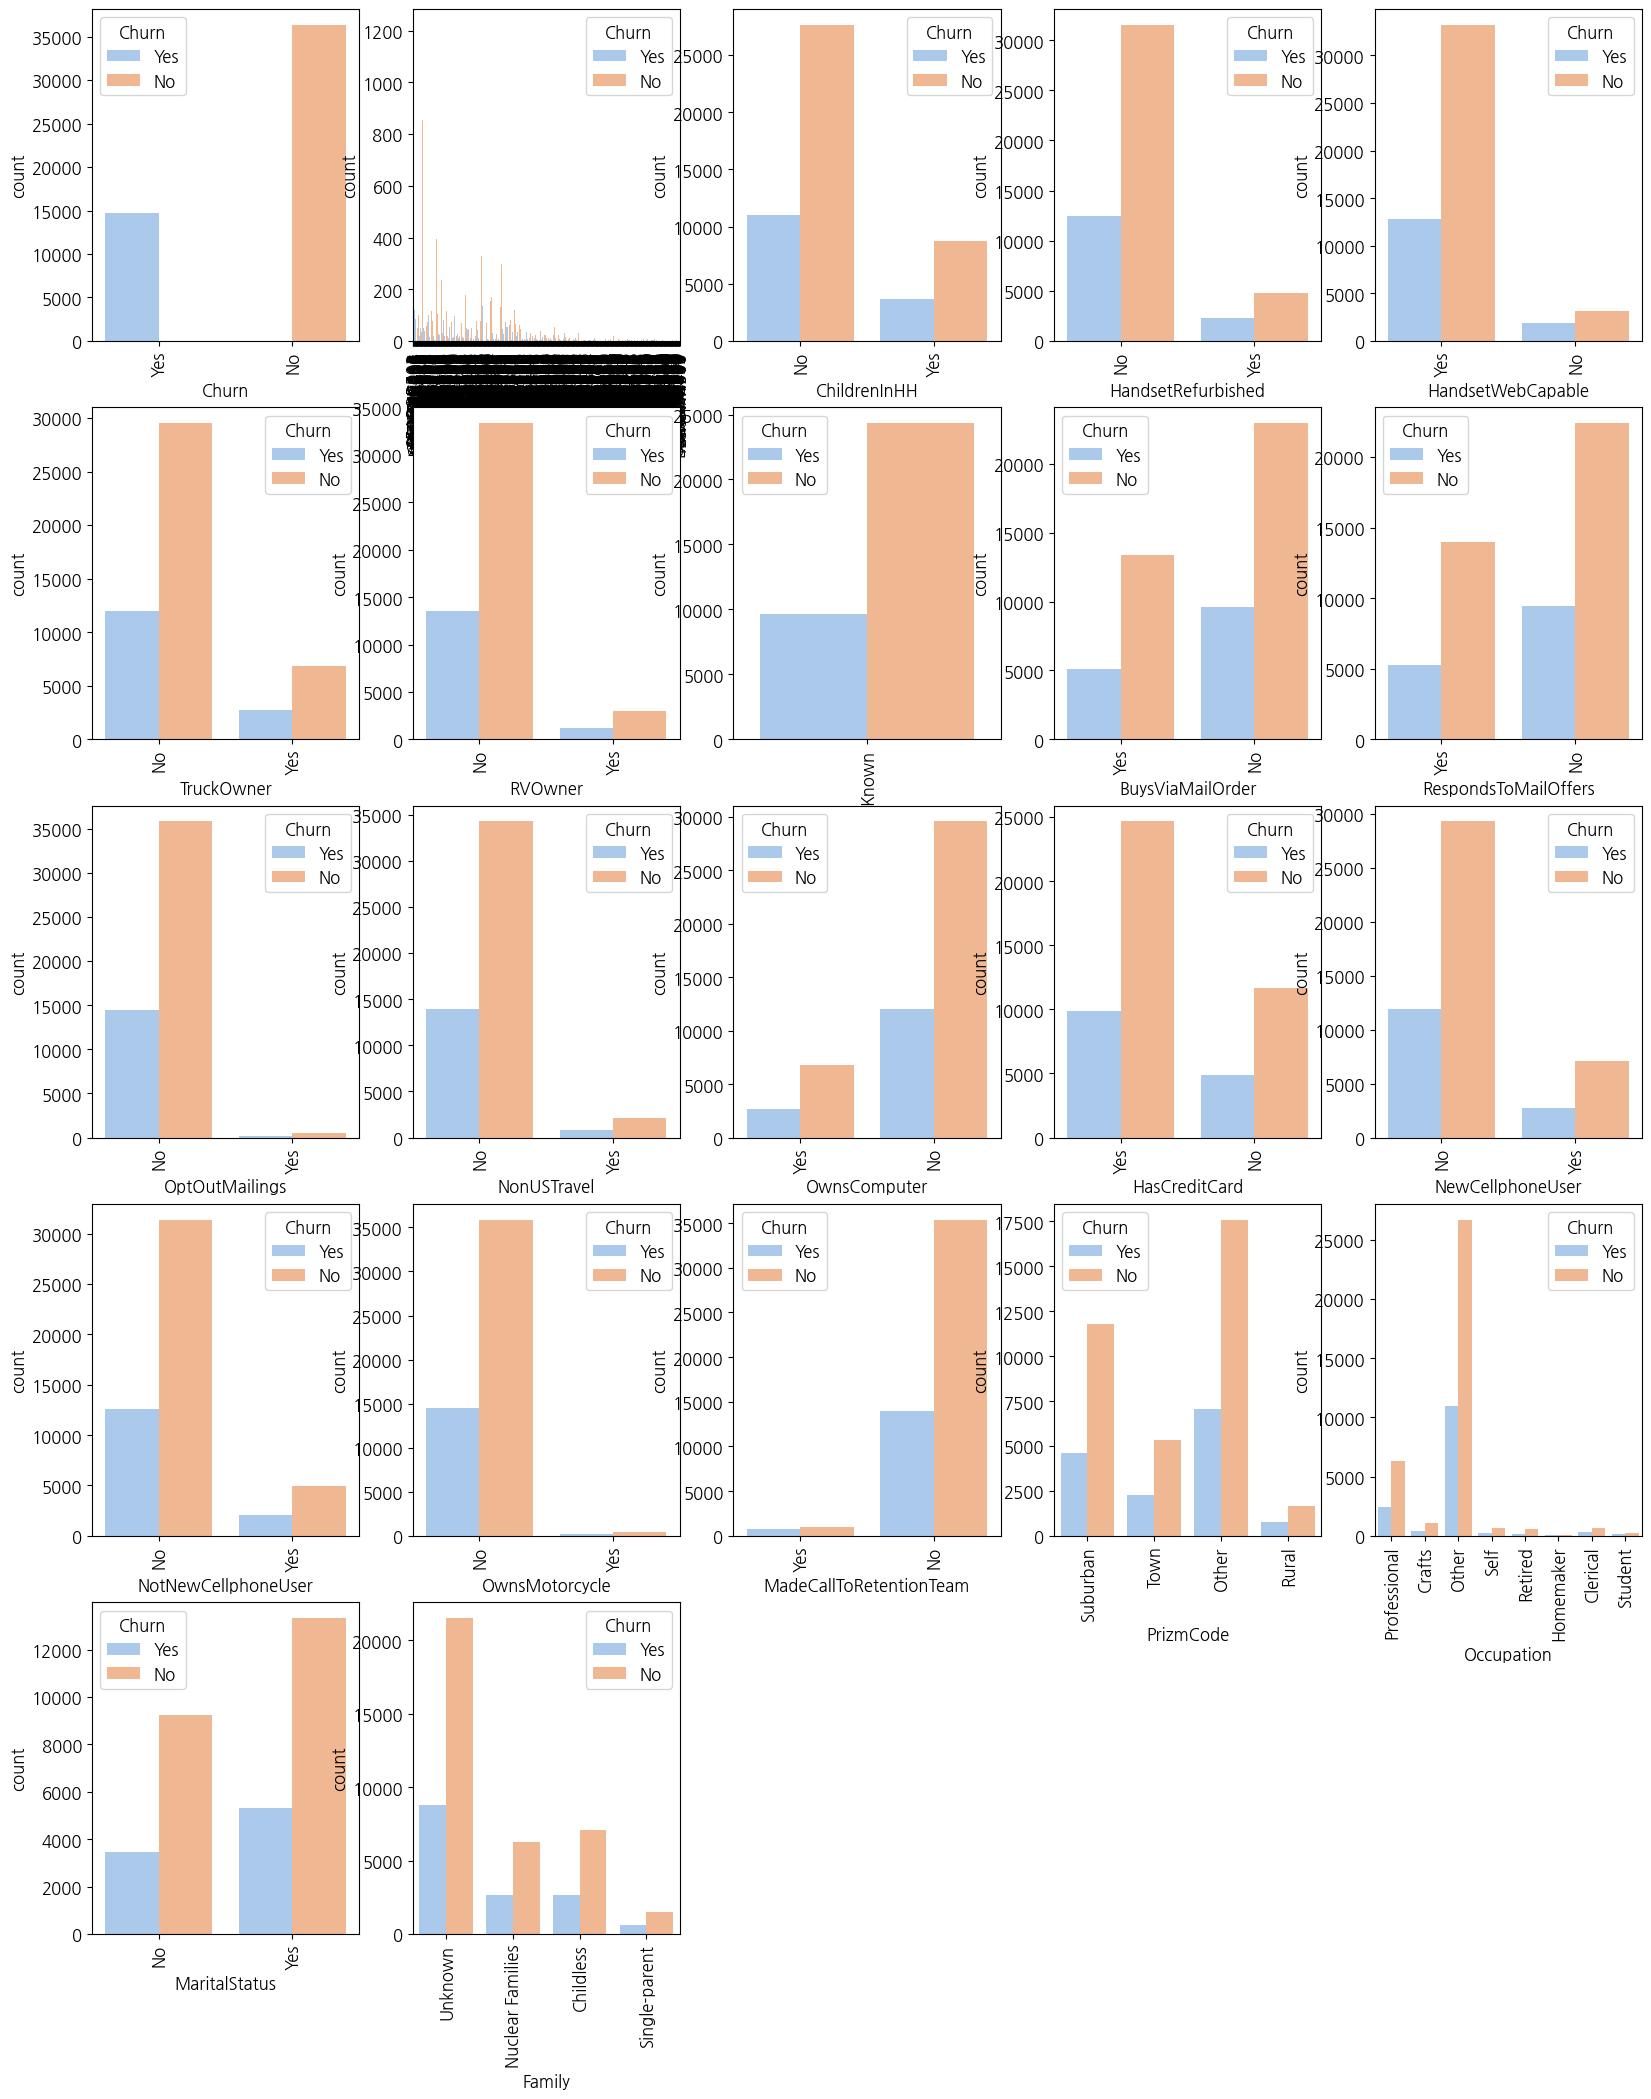

In [70]:
object_columns = df.select_dtypes(include=['object']).columns
# object_columns = object_columns[object_columns != 'Family']

number_of_plots = len(object_columns)
fig, axes = plt.subplots((number_of_plots // plots_per_row) + (number_of_plots % plots_per_row != 0), plots_per_row)
axes = axes.flatten()

count = 0
for col in object_columns:
    if count >= len(axes):
        break
    a = sns.countplot(x=df[col], hue=df.Churn, ax=axes[count])
    a.tick_params(axis='x', labelrotation=90)
    count += 1

for i in range(1, len(axes) - number_of_plots + 1):
    fig.delaxes(axes[-i])

fig.set_figwidth(20)
fig.set_figheight(25)
plt.show()

In [71]:
# null(None) 값이 들어있는 데이터 각 컬럼별로 집계
null_rows_selector = df.isnull().any(axis=1)
null_row_count = df[null_rows_selector].shape[0]

df_null = df.isnull().groupby(df.Churn).sum().transpose()
df_null['total'] = df.isnull().sum()
df_null['percent'] = (df_null['total'] / len(df)) * 100
df_null = df_null[df_null.total != 0]

print("rows with null values: ", null_row_count, ", {:.2f}%".format((null_row_count / len(df) * 100)))
print('columns with null values: ', df_null.shape[0])

df_null

rows with null values:  39272 , 76.93%
columns with null values:  16


Churn,No,Yes,total,percent
MonthlyRevenue,86,70,156,0.305601
MonthlyMinutes,86,70,156,0.305601
TotalRecurringCharge,86,70,156,0.305601
DirectorAssistedCalls,86,70,156,0.305601
OverageMinutes,86,70,156,0.305601
RoamingCalls,86,70,156,0.305601
PercChangeMinutes,159,208,367,0.718945
PercChangeRevenues,159,208,367,0.718945
ServiceArea,12,12,24,0.047015
Handsets,1,0,1,0.001959


<Axes: >

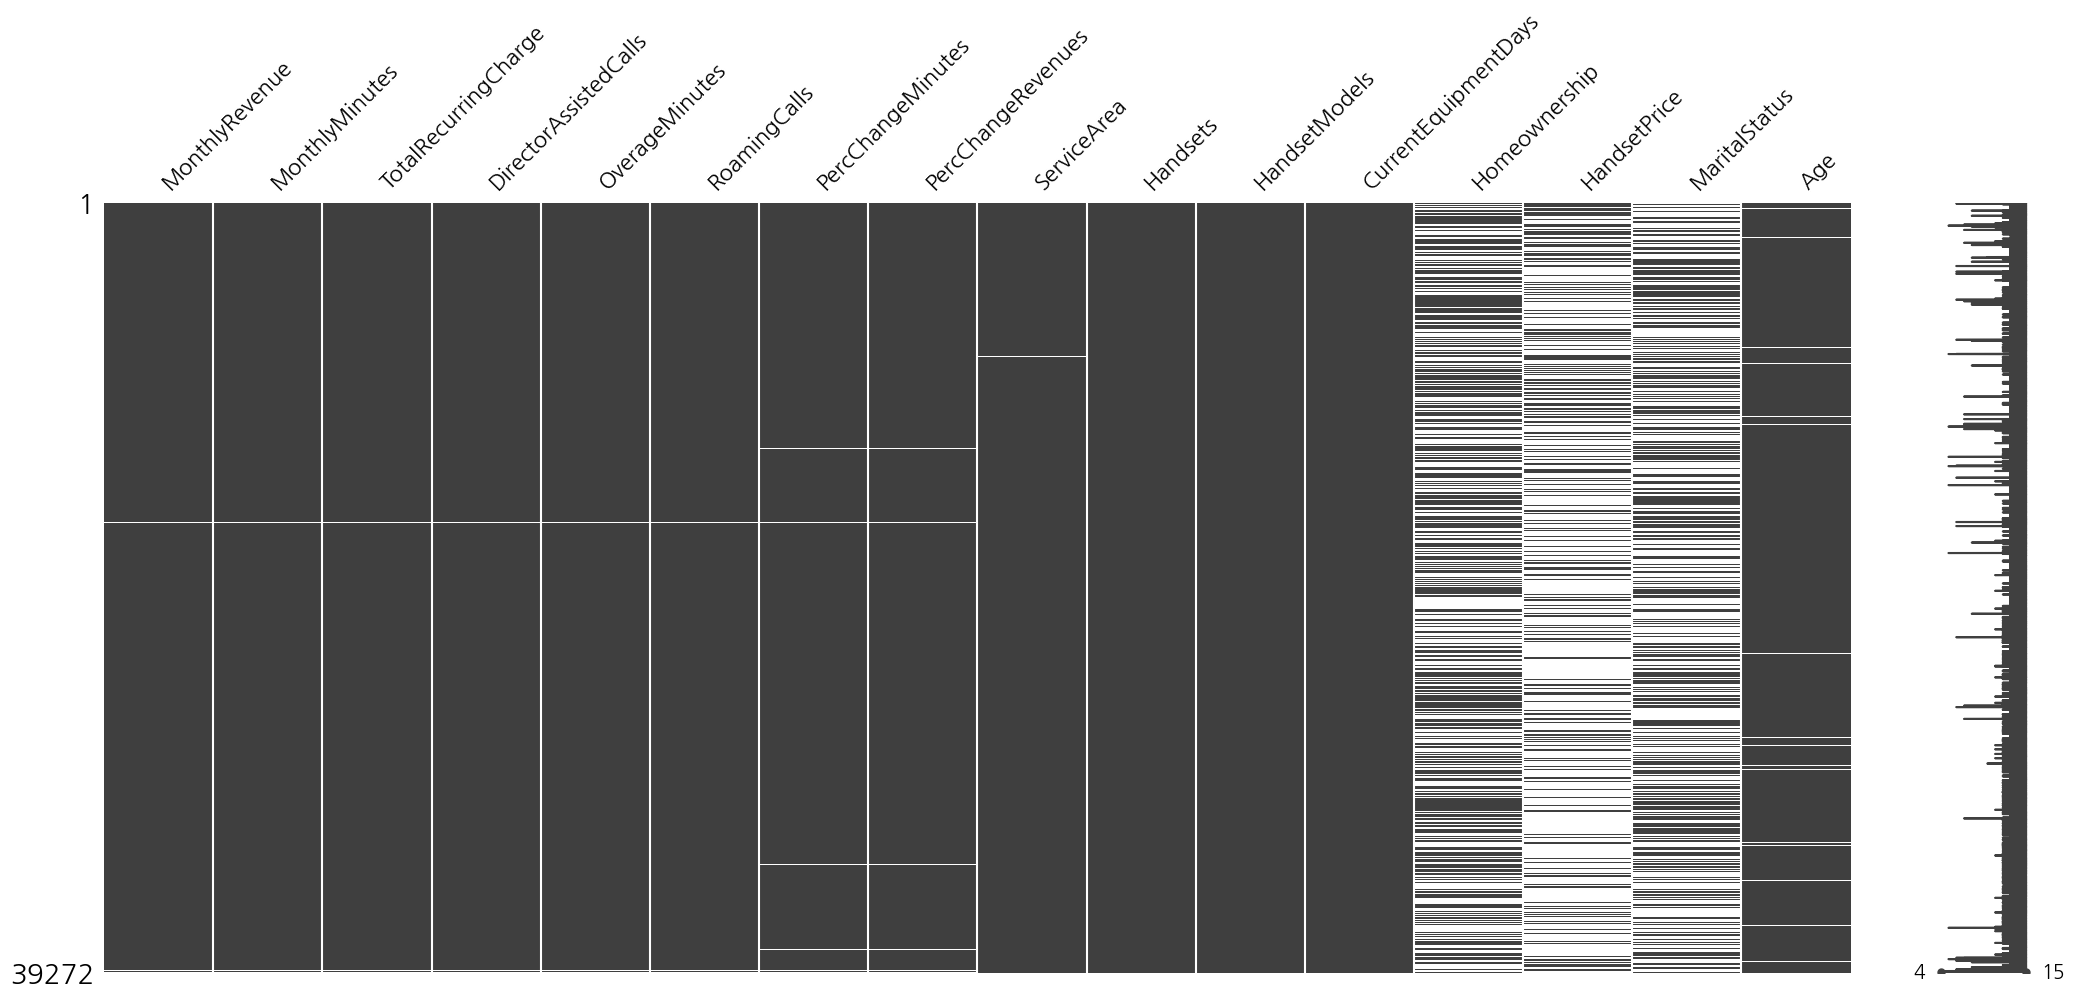

In [72]:
# null 데이터가 들어있는 비중 시각화
# 결측치가 없으면 색으로, 결측치가 있으면 흰색으로 시각화
viz_null = df[null_rows_selector][df_null.index]
msno.matrix(viz_null)

In [73]:
# 기존 데이터의 라벨과 null이 들어있는 데이터를 제외하고 나서의 라벨 구성 비율 비교
pd.concat([df.Churn.value_counts(normalize=True).rename("Overall"), df[null_rows_selector].Churn.value_counts(normalize=True).rename("within_null_rows")], axis=1)

,Overall,within_null_rows
No,0.711815,0.704039
Yes,0.288185,0.295961


In [74]:
contingency_table = pd.concat([df.Churn.value_counts().rename("Overall"), df[null_rows_selector].Churn.value_counts()
                               .rename("within_null_rows")], axis=1).transpose()
contingency_table

,No,Yes
Overall,36336,14711
within_null_rows,27649,11623


In [75]:
# 카이제곱 독립성 검정
# H0: 이탈여부의 분포는 결측치가 포함된 데이터를 포함해도 유의미한 상관관계가 없을 것이다.

stat, p, dof, expected = chi2_contingency(contingency_table.values)

# p-value 확인
alpha = 0.05 # 유의값 수준
print("p value is " + str(p))

print("Dependent (reject H0)") if p <= alpha else print("Independent (H0 holds true)")

p value is 0.011032150497537023
Dependent (reject H0)


## 유의수준보다 작으므로 영가설 기각, 대립가설 채택
# H1: 이탈여부의 분포는 결측치가 포함된 데이터를 포함해야 유의미한 상관관계가 있을 것이다.
## 결측치가 있는 데이터가 상대적으로 많아, 해당 데이터들은 통계적으로 이탈 여부에 중요한 영향을 미친다.
## 따라서 결측치를 또다른 특징으로 간주하고 결측치를 연속형이면 '평균', 이산형이면 '최빈값'인 'Unknown' 문자열로 대치하여 훈련에 사용할 것임. 

In [76]:
def chi2test(X, y, alpha=0.05):
    # X: DataFrame
    # y: series
    
    target = y.name
    test_df = []
    for index, col in X.select_dtypes(include=['object']).columns.to_series().items():
        df = pd.concat([y, X[col]], axis=1)
        contingency_table = df.value_counts().rename('counts').reset_index().pivot(index=target, columns=col, values='counts').fillna(0)
        
        if not contingency_table.empty:
            stat, p, dof, expected = chi2_contingency(contingency_table.values)
            test_df.append([target, col, stat, p, 
                          'Dependent (reject H0)' if p <= alpha else 'Independent (H0 holds true)','include' if p <= alpha else 'drop'])
        
    test_df = pd.DataFrame(test_df, columns=["variable1", "variable2", "chi2-stat", "p-value", "result", "recommendation"])
    return test_df

chi2test(df.drop('Churn', axis=1), df['Churn'])

,variable1,variable2,chi2-stat,p-value,result,recommendation
0,Churn,ServiceArea,959.134195,1.862609e-07,Dependent (reject H0),include
1,Churn,ChildrenInHH,4.618176,3.163486e-02,Dependent (reject H0),include
2,Churn,HandsetRefurbished,45.595205,1.453971e-11,Dependent (reject H0),include
3,Churn,HandsetWebCapable,196.373257,1.292123e-44,Dependent (reject H0),include
4,Churn,TruckOwner,1.157607,2.819623e-01,Independent (H0 holds true),drop
5,Churn,RVOwner,0.581561,4.457013e-01,Independent (H0 holds true),drop
6,Churn,Homeownership,0.000000,1.000000e+00,Independent (H0 holds true),drop
7,Churn,BuysViaMailOrder,23.993398,9.666660e-07,Dependent (reject H0),include
8,Churn,RespondsToMailOffers,26.688591,2.390287e-07,Dependent (reject H0),include
9,Churn,OptOutMailings,0.000000,1.000000e+00,Independent (H0 holds true),drop


In [77]:
## 'ServiceArea' 컬럼이 가장 상관관계가 높을 것으로 판단.
## 이산형 변수들의 카이제곱 검정 결과 파악 후, t-test 검정을 통해 컬럼마다 각 평균의 통계적으로 유의미한 차이가 있는지 확인

def t_test(X, y, alpha=0.05):
    target = y.name
    print('t_test with alpha', alpha)
    test_df = []
    for index, col in X.select_dtypes(exclude=['object']).columns.to_series().items():
        df = pd.concat([y, X[col]], axis=1)
        ttest_df = df.set_index(target, drop=True).fillna(0)
        # 비교하는 각각의 집단의 분산이 다르므로 Welch's t-검정을 실시할 것임.
        # Welch's t-test의 선행조건
        # 1. 자료는 모두 동일 간격을 가진 연속형 수치여야 한다
        # 2. 두 집단은 서로 독립적이어야한다
        # 3. 자료의 수치는 정규성을 가져야 한다.
        # 4. 두 집단 각각 추정된 분산이 다르다.
        stat, p = ttest_ind(ttest_df.loc["Yes"], ttest_df.loc["No"], equal_var=False) 
        test_df.append([target, col, stat, p,
                     'Dependent (reject H0)' if p <= alpha else 'Independent (H0 holds true)', 'include' if p <= alpha else 'drop'])
        
    test_df = pd.DataFrame(test_df, columns=['variable1', 'variable2', 't-test', 'p-value', 'result', 'recommendation'])
    return test_df

t_test(df.drop('Churn', axis=1), df['Churn'])

t_test with alpha 0.05


,variable1,variable2,t-test,p-value,result,recommendation
0,Churn,MonthlyRevenue,[-3.0178789820785163],[0.0025478602791834813],Dependent (reject H0),include
1,Churn,MonthlyMinutes,[-11.877849954853874],[1.835797057997502e-32],Dependent (reject H0),include
2,Churn,TotalRecurringCharge,[-14.52160176239891],[1.310521238648181e-47],Dependent (reject H0),include
3,Churn,DirectorAssistedCalls,[-4.8450245034580215],[1.2718380411479795e-06],Dependent (reject H0),include
4,Churn,OverageMinutes,[3.687404466662035],[0.00022697324858136802],Dependent (reject H0),include
5,Churn,RoamingCalls,[2.244494743224252],[0.024809892182594915],Dependent (reject H0),include
6,Churn,PercChangeMinutes,[-7.448350298200055],[9.747511469363198e-14],Dependent (reject H0),include
7,Churn,PercChangeRevenues,[2.282802936514573],[0.02245132129026347],Dependent (reject H0),include
8,Churn,DroppedCalls,[-3.5273600982343885],[0.000420395910890245],Dependent (reject H0),include
9,Churn,BlockedCalls,[-1.2668362619480196],[0.2052243596847742],Independent (H0 holds true),drop


In [78]:
X = train.drop('Churn', axis=1)
y = train['Churn']
X.columns

Index(['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge',
       'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls',
       'PercChangeMinutes', 'PercChangeRevenues', 'DroppedCalls',
       'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls', 'ThreewayCalls',
       'ReceivedCalls', 'OutboundCalls', 'InboundCalls', 'PeakCallsInOut',
       'OffPeakCallsInOut', 'DroppedBlockedCalls', 'CallForwardingCalls',
       'CallWaitingCalls', 'MonthsInService', 'UniqueSubs', 'ActiveSubs',
       'Handsets', 'HandsetModels', 'CurrentEquipmentDays', 'ChildrenInHH',
       'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner',
       'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers',
       'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard',
       'RetentionCalls', 'RetentionOffersAccepted', 'NewCellphoneUser',
       'NotNewCellphoneUser', 'ReferralsMadeBySubscriber', 'IncomeGroup',
       'OwnsMotorcycle', 'AdjustmentsToCreditRating', 'Hands

In [79]:
class GridSearch:
    
    def __init__(self, df, model):
        self.df = df
        self.model = model
    
    def best_params_predict(self, df, model):
        df_cv = self.df.copy()

        param_grid = {
            'n_estimators' : (50, 100),
            'max_features': (10, 100),
            'max_depth': (4, 20),
            'min_samples_split': (10, 100),
            'min_samples_leaf': (30, 300),
            'max_leaf_nodes': (20, 50)
        }

        object_cols = df_cv.select_dtypes(include=['object']).columns
        df_cv[object_cols] = df_cv[object_cols].apply(LabelEncoder().fit_transform)
        df_cv.dropna(inplace=True)

        X = df_cv.drop('Churn', axis=1)
        y = df_cv['Churn']

        grid_search = GridSearchCV(model, param_grid, cv=5)
        grid_search.fit(X, y)

        best_params = grid_search.best_params_
        best_model = grid_search.best_estimator_
 
        model = best_model
        model.fit(X, y)

        importances = model.feature_importances_
        feature_importances = dict(zip(X.columns, importances))
        top_3_features = sorted(feature_importances, key=feature_importances.get, reverse=True)[:3]

        predictions = model.predict(X)
        probas = model.predict_proba(X)

        accuracy = accuracy_score(y, predictions)
        precision = precision_score(y, predictions, pos_label=1)
        recall = recall_score(y, predictions, pos_label=1)
        f1 = f1_score(y, predictions, pos_label=1)
        tn = ((y == 0) & (predictions == 0)).sum()
        fp = ((y == 0) & (predictions == 1)).sum()
        specificity = tn / (tn + fp)
        roc = roc_auc_score(y, probas[:, 1])
        
        perm = PermutationImportance(model, scoring = 'f1', random_state=70).fit(X, y)
        eli = eli5.show_weights(perm, top=15, feature_names=X.columns.tolist())

        # 빈 데이터프레임 생성
        results_df = pd.DataFrame(columns=['Metric', 'Value'])

        # 각 지표 계산 및 데이터프레임에 추가
        metrics = ["Best Parameters", "Best Model", "Top 3 Features", 'Accuracy', 'Precision', 'Recall',
                   'F1-Score', 'Specificity', 'ROC']
        values = [best_params, best_model, top_3_features, accuracy, precision, recall, f1, specificity, roc]

        for metric, value in zip(metrics, values):
            results_df = results_df.append({'Metric': metric, 'Value': value}, ignore_index=True)


        return results_df, eli

    


In [111]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score
)
import shap
import eli5
from eli5.sklearn import PermutationImportance

class GridSearch:
    
    def __init__(self, df, model):
        self.df = df
        self.model = model
    
    def preprocess_data(self, df):
        df_cv = df.copy()
        object_cols = df_cv.select_dtypes(include=['object']).columns
        df_cv[object_cols] = df_cv[object_cols].apply(LabelEncoder().fit_transform)
        df_cv.dropna(inplace=True)
        return df_cv

    def fit_best_model(self, X, y):
        param_grid = {
            'n_estimators' : (50, 100),
            'max_features': (10, 100),
            'max_depth': (4, 20),
            'min_samples_split': (10, 100),
            'min_samples_leaf': (30, 300),
            'max_leaf_nodes': (20, 50)
        }

        grid_search = GridSearchCV(self.model, param_grid, cv=5)
        grid_search.fit(X, y)

        return grid_search.best_params_, grid_search.best_estimator_

    def evaluate_model(self, model, X, y):
        predictions = model.predict(X)
        probas = model.predict_proba(X)

        accuracy = accuracy_score(y, predictions)
        precision = precision_score(y, predictions, pos_label=1)
        recall = recall_score(y, predictions, pos_label=1)
        f1 = f1_score(y, predictions, pos_label=1)
        tn = ((y == 0) & (predictions == 0)).sum()
        fp = ((y == 0) & (predictions == 1)).sum()
        specificity = tn / (tn + fp)
        roc = roc_auc_score(y, probas[:, 1])

        return accuracy, precision, recall, f1, specificity, roc

    def get_permutation_importance(self, model, X, y):
        perm = PermutationImportance(model, scoring='f1', random_state=70).fit(X, y)
        eli = eli5.show_weights(perm, top=15, feature_names=X.columns.tolist())
        return eli


    def shap_summary_plots(self, model, X, top_k=10, prediction_index=0):
        explainer = shap.TreeExplainer(model) 
        shap_values = explainer.shap_values(X)

        # Create SHAP summary plots
        shap.summary_plot(shap_values, X, feature_names=X.columns, plot_type='bar', max_display=top_k)

        # # 중요도에 따라 특성 정렬
        # feature_names = X.columns
        # feature_importance = np.abs(shap_values).mean(axis=0)
        # top_inds = np.argsort(-np.sum(np.abs(shap_values), 0))[:top_k]
        # top_feature_names = feature_names[top_inds]

        # shap.initjs()


        # # 영향력 top 2 컬럼
        # for i in range(2):
        #     shap.dependence_plot(top_inds[i], np.array(shap_values), X)  # shap_values를 배열로 변환

        # shap.force_plot(explainer.expected_value[1], shap_values[0, :], X.iloc[0, :], feature_names=top_feature_names)

        # shap.summary_plot(shap_values, X)

        # shap_interaction_values = explainer.shap_interaction_values(X)
        # shap.summary_plot(shap_interaction_values, X)

    def best_params_predict(self):
        df_cv = self.preprocess_data(self.df)
        X = df_cv.drop('Churn', axis=1)
        y = df_cv['Churn']

        best_params, best_model = self.fit_best_model(X, y)
        model = best_model
        model.fit(X, y)

        importances = model.feature_importances_
        feature_importances = dict(zip(X.columns, importances))
        top_3_features = sorted(feature_importances, key=feature_importances.get, reverse=True)[:3]

        accuracy, precision, recall, f1, specificity, roc = self.evaluate_model(best_model, X, y)

        eli = self.get_permutation_importance(best_model, X, y)
        self.shap_summary_plots(best_model, X)

        # Create a results DataFrame
        results_df = pd.DataFrame(columns=['Metric', 'Value'])

        metrics = ["Best Parameters", "Best Model", "Top 3 Features", "Accuracy", "Precision", "Recall",
                   "F1-Score", "Specificity", "ROC"]
        values = [best_params, best_model, top_3_features, accuracy, precision, recall, f1, specificity, roc]

        for metric, value in zip(metrics, values):
                results_df = results_df.append({'Metric': metric, 'Value': value}, ignore_index=True)
 

        return results_df, eli


### RandomForestClassifier 

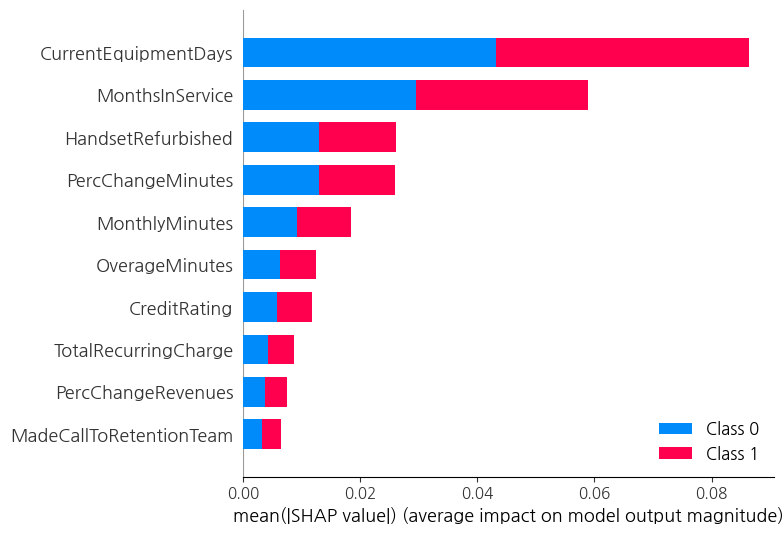

Metric  \
0  Best Parameters   
1  Best Model        
2  Top 3 Features    
3  Accuracy          
4  Precision         
5  Recall            
6  F1-Score          
7  Specificity       
8  ROC               

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [110]:
pd.set_option('display.max_colwidth', -1)
model = RandomForestClassifier(n_jobs=-1, random_state=70)
# Create an instance of the GridSearch class
grid_search = GridSearch(df, model)
# Run the grid search and get results
results_df, eli = grid_search.best_params_predict()
results_df

In [112]:
eli

Weight,Feature
0.0250 ± 0.0033,MonthlyMinutes
0.0174 ± 0.0017,CurrentEquipmentDays
0.0132 ± 0.0022,MonthsInService
0.0064 ± 0.0022,HandsetRefurbished
0.0020 ± 0.0030,CreditRating
0.0008 ± 0.0009,ReceivedCalls
0.0007 ± 0.0005,DroppedBlockedCalls
0.0003 ± 0.0000,MadeCallToRetentionTeam
0.0003 ± 0.0000,PeakCallsInOut
0.0003 ± 0.0003,InboundCalls


* 월 사용시간, 현재까지 소유한 일 수, 월 서비스 총 시간, 수신기 리퍼(성능에서 이상없으나 제품에서 탈락) 여부 정도가 주요 feature

## 최적화 모델 찾기

In [139]:
from imblearn.pipeline import make_pipeline


In [140]:
class Experiment:
    
    def __init__(self, model, data_transformer, pbounds=None):
        # model과 data_transformer는 아래에서 미리 선언해 둔 객체들을 가져옴
        # 그리고 self로 전달받아, Experiment Class 내에서 계속 사용할 것임
        self.model = model
        self.data_transformer = data_transformer
        self.results = None
        self.pbounds = pbounds
        self.results_df = pd.DataFrame(columns=['model_name', 'accuracy', 'precision', 'recall', 'f1', 'specificity', 'roc'])
        
    def evaluate(self, X, y):
        results = dict()
        predictions = self.model.predict(X)
        probas = self.model.predict_proba(X)
        results['report'] = metrics.classification_report(y, predictions, output_dict=True)
        results['roc'] = metrics.roc_auc_score(y, probas[:, 1])
        return results
    
    def hyper_parameter_tuning(self, X_train, y_train, X_val, y_val):
        
        def opt_function(**kwargs):
            current_params = dict()
            for key in self.pbounds:
                current_params[key] = int(kwargs[key])
            self.model.set_params(**current_params)
            self.model.fit(X_train, y_train)
            result = self.evaluate(X_val, y_val)
            return result['roc']
        
        optimizer = BayesianOptimization(
            f=opt_function,
            pbounds=self.pbounds,
            random_state=70,
            verbose=2
        )
        
        optimizer.maximize(
            init_points=10,
            n_iter=10,
        )
        
        params = optimizer.max['params']
        for key in params:
            params[key] = int(params[key])
        print('optimal target', optimizer.max['target'])
        print(params)
        
        return params
    
    def prep_data(self, df, target='Churn'):
        
        # stratify: 기존 데이터를 나눈 후, 클래스의 분포 비율도 근사시키려 시도해주는 파라미터
        X_train, X_test, y_train, y_test = train_test_split(df.drop(target, axis=1),
                                                            df[target], test_size=0.2, random_state=70, stratify=df[target])
        X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=70, stratify=y_train)
        
        print(X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape)
        
        # 3. DataTransformer Class의 fit_transform 함수 부분 실행
        X_train, y_train = data_transformer.fit_transform(X_train, y_train)
        
        # 11. 마찬가지로, 검증 및 테스트 데이터들도 transform 진행하여 학습된 모델의 성능을 테스트함
        X_val, y_val = data_transformer.transform(X_val, y_val)
        X_test, y_test = data_transformer.transform(X_test, y_test)
        
        print(X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape)
        
        return X_train, y_train, X_val, y_val, X_test, y_test
    
    def __format_results__(self, results):
        r = pd.DataFrame(results)
        g = pd.concat([pd.DataFrame(x) for x in r.loc['report']])
        g.index = pd.MultiIndex.from_product([['train_data','val_data','test_data'], ['precision','recall','f1-score','support']],
                                            names=['dataset', 'metric'])
        return g.join(r.loc['roc'], on=['dataset'])
    
    # 1. 여기서 모델링이 시작됩니다.
    # 데이터와 hptuning은 미리 선언하였으나, 예상치 못한 상황에 대비하여 가변 키워드 인자(**kwargs)를 받아 유연하게 처리
    def run(self, df, hptuning=False, **kwargs):
        # 2. Experiment Class의 prep_data 함수 부분 실행하여 전처리
        X_train, y_train, X_val, y_val, X_test, y_test = self.prep_data(df)
        
        # 12. 시작할 때 이미 모델을 지정했지만, 각 모델별 성능 차이를 보기 위해 Experiment Class내 comparison_models 실행
        self.comparison_models(X_test, y_test, X_train, y_train)
        
        # 13. 하이퍼 파라미터 튜닝 기능을 on 하였으므로 해당 클래스에서 하이퍼 파라미터 튜닝 함수 실행
        if hptuning:
            params = self.hyper_parameter_tuning(X_train, y_train, X_val, y_val)
            # 14. 사용하기로 한 모델에 최적화된 파라미터 적용
            self.model = model.set_params(**params)
            
        # 15. 모델에 학습 데이터를 fit
        %time self.model.fit(X_train, y_train, **kwargs)
        
        # 16. 나눈 데이터들을 각각 evaluate 함수에 넣어 평가 진행
        results = dict()
        results['train_data'] = self.evaluate(X_train, y_train)
        results['val_data'] = self.evaluate(X_val, y_val)
        results['test_data'] = self.evaluate(X_test, y_test)
        
        # 17. 각각 평가된 지표들을 보기 좋게 데이터프레임 형태로 가공
        self.results = self.__format_results__(results)

        return self.results, self.results_df
    
    def test_evaluate(self, X):
        results = dict()
        predictions = self.model.predict(X)
        probas = self.model.predict_proba(X)
        
        return results, predictions, probas
    
    # 실제 라벨이 없는 데이터들을 학습 데이터 형태로 변환시킨 후 예측 진행
    def test_run(self, df, hptuning=False, **kwargs):
        X_test = df
        X_test = data_transformer.test_transform(X_test)
        
        results = dict()
        results, predictions, probas = self.test_evaluate(X_test)
        
        return results, predictions, probas
    
    def df_add(self, model_name, y_test, pred):
        accuracy = accuracy_score(y_test, pred)
        precision = precision_score(y_test, pred)
        recall = recall_score(y_test, pred)
        f1 = f1_score(y_test, pred)
        tn = ((y_test == 0) & (pred == 0)).sum()
        fp = ((y_test == 0) & (pred == 1)).sum()
        specificity = tn / (tn + fp)
        roc = roc_auc_score(y_test, pred)
        
        
        # 결과를 빈 데이터프레임에 추가
        self.results_df = self.results_df.append({'model_name': model_name, 'accuracy': accuracy, 'precision': precision,
                                            'recall': recall, 'f1': f1, 'specificity': specificity, 'roc': roc},
                                            ignore_index=True)

        # results_df.loc[len(results_df)] = [model_name, accuracy, precision, recall, f1, specificity, roc]
    
    def comparison_models(self, X_test, y_test, X_train, y_train):
        models = []
        models.append(('RandomForestClassifier', RandomForestClassifier(n_jobs=-1)))
        models.append(('DecisionTreeClassifier', DecisionTreeClassifier()))
        models.append(('AdaBoostClassifier', AdaBoostClassifier()))
        models.append(('GradientBoostingClassifier', GradientBoostingClassifier()))
        models.append(('LogisticRegression', LogisticRegression()))
        models.append(('XgboostClassifier', XGBClassifier()))
        models.append(('LGBMClassifier', LGBMClassifier()))
        
        for name, model in models:
            kfold = KFold(n_splits=5, random_state=70, shuffle=True)
            cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')

            model.fit(X_train, y_train)
            pred = model.predict(X_test)

            self.df_add(name, y_test, pred)
            
       

In [141]:
class DataTransformer:
    
    def selectColumns(self, X, y):
        cols = []
        for func in [chi2test, t_test]:
            test_df = func(X, y)
            included_columns = test_df[test_df['recommendation'] == 'include']['variable2'].tolist()
            dropped_columns = test_df[test_df['recommendation'] == 'drop']['variable2'].tolist()
          
            print('dropped columns: ', dropped_columns, len(dropped_columns))
            cols.extend(included_columns)
                    
        return cols
    
    def undersampling_show(self, X, y):
        RandomUnderSampling = RandomUnderSampler(random_state=70)
        X_resampled, y_resampled = RandomUnderSampling.fit_resample(X, y)
        under = pd.concat([X_resampled, y_resampled], axis=1)
        value_counts = under['Churn'].value_counts()
        
        ax = value_counts.plot(kind='bar', color=['blue', 'orange'])
        
        def autolabel_percent(rects):
            for rect in rects:
                height = rect.get_height()
                ax.text(rect.get_x() + rect.get_width() / 2, height,
                        f'{height} ({height / value_counts.sum() * 100:.1f}%)',
                        ha='center', va='bottom')

        autolabel_percent(ax.patches)
        plt.xticks(rotation=360)
        plt.show()
        
    def drop_outlier(self, df):
        # n_estimators : 노드 수
        # max_samples : 샘플링 수
        # contamination : 이상치 비율
        # max_features : 사용하고자 하는 독립변수 수(1이면 전부 사용)
        # random_state : seed를 일정하게 유지
        # n_jobs : CPU 병렬처리 유뮤(1: 사용하지 않음, -1: 전체 CPU 사용)
        
        clf_ss = IsolationForest(n_estimators=100,
                              max_samples="auto", 
                              contamination=0.01,
                              max_features=1,
                              bootstrap=False,
                              n_jobs=1,
                              random_state=None,
                              verbose=0)
        
        # IsolationForest를 사용하려면 데이터 형식이 통일되어야 한다.
        df.columns = df.columns.astype(str)
        # IsolationForest에 데이터프레임을 넣고 이상치 판별
        clf_ss.fit(df)

        # predict 함수를 이용하여, outlier를 판별해 준다. 0과 1로 이루어진 Series형태의 데이터가 나온다.
        y_pred_outliers = clf_ss.predict(df)

        # 이상치의 개수를 Count하는 과정
        collections.Counter(y_pred_outliers)

        # 이상치 제거 과정
        df['out'] = y_pred_outliers
        outliers = df.loc[df['out']== -1]
        outlier_index = list(outliers.index)
        
        # 주성분 분석(Principal Component Analysis)을 통해 제거되는 데이터들 시각화
        pca = PCA(3)
        pca.fit(df)
        res=pd.DataFrame(pca.transform(df))
        Z = np.array(res)
        plt.title("IsolationForest")
        b1 = plt.scatter(res[0], res[1], c='green', s=20, label="normal points")
        b1 = plt.scatter(res.iloc[outlier_index,0],res.iloc[outlier_index,1], c='green',s=20,
                         edgecolor="red",label="predicted outliers")
        plt.legend(loc="upper right")
        plt.show()

        X = df[df['out'] != -1]
        y = X['Churn']
        X = X.drop(['Churn', 'out'], axis=1)
        
        return (X, y)
    
    def __init__(self, missingIndicator=False, featureSelection=False):
        
        self.featureSelection = featureSelection
        self.selectedColumns = None
        
        # SImpleImputer: 결측값 대체. 연속형 변수는 평균으로 대체
        cont_imputer = SimpleImputer(strategy='mean')
        # RobustScaler: 이상치가 많거나 데이터의 분포가 비대칭적인 경우에 사용.
        # 중앙값과 IQR을 사용하여 데이터 변환
        # 중앙값을 0으로, IQR을 1로 스케일링하여 데이터의 분포 조정
        cont_normalizer = RobustScaler()
        cont_pipeline = make_pipeline(cont_imputer, cont_normalizer)
        
        if missingIndicator:
            # MissingIndicator: 결측값을 감지하고 해당 위치를 표시함으로써 결측값의 존재 여부를 나타내는 새로운 특성을 만듦
            # features='all'의 경우, 모든 특성(열)에 대해서 결측값을 검출
            cont_missing_indicator = MissingIndicator(features='all')
            cont_pipeline = make_union(cont_pipeline, cont_missing_indicator)
            
        # Categorical 변수는 상수('Unknown' 문자열)로 대체
        cat_imputer = SimpleImputer(strategy='constant', fill_value='Unknown')
        # LeaveOneOutEncoder: 범주형 변수를 수치형으로 변환
        # 시그마: 과적합을 줄이기 위한 수단, 표준 편차를 제공해 준다.
        cat_encoder = CE.leave_one_out.LeaveOneOutEncoder(sigma=0.05)
        cat_pipeline = make_pipeline(cat_imputer, cat_encoder)
        
        if missingIndicator:
            cat_missing_indicator = MissingIndicator(features='all')
            cat_pipeline = make_union(cat_pipeline, cat_missing_indicator)
        
        # 모두 사이킷런에 들어있는 라이브러리 사용
        # 연속형 변수는 문자형 컬럼은 제외, 이산형 변수는 문자형 컬럼도 포함
        cont_selector = make_column_selector(dtype_exclude='object')
        cat_selector = make_column_selector(dtype_include='object')
        cont_cat_split_transform = make_column_transformer((cont_pipeline, cont_selector),
                                                           (cat_pipeline, cat_selector), remainder='passthrough')
        xpipe = make_pipeline(cont_cat_split_transform)
        ypipe = LabelEncoder()
        
        self.X_pipeline = xpipe
        self.y_pipeline = ypipe
        
    # 4. 학습데이터의 fit_transform 진행
    def fit_transform(self, X, y):
        # 5. 처음에 featureSelection 변수를 True로 설정했다면 여기서 통계 검정을 통한 특성(열) 선별 실시
        if self.featureSelection:
            # 6. DataTransformer Class의 selectColumns 함수 부분 실행
            self.selectedColumns = self.selectColumns(X, y)
            # 7. 해당 특성(열) 부분들만 가져옴
            X = X[self.selectedColumns]
        # 8. DataTransformer의 초기 설정(__init__) 부분에서 초기 선언된 X_pipeline, y_pipeline을 가져온 후 fit_transform 진행
        y = self.y_pipeline.fit_transform(y)
        X = self.X_pipeline.fit_transform(X, y)
        
        # 9. 이상치 제거 후 다시 반환
        train_if_X = pd.DataFrame(X)
        train_if_y = pd.DataFrame({'Churn' : y})
        train_if = pd.concat([train_if_X, train_if_y], axis=1)
        X, y = self.drop_outlier(train_if)
        
        # 10. DataTransformer Class의 undersampling_show(언더샘플링 된 데이터 갯수와 비율을 각각 보여줌) 함수 실행
        self.undersampling_show(X, y)
        
        # 다시 반환. 나머지 절차들도 이러한 식으로 두 Class를 이동하며 데이터 전처리, 학습, 예측을 진행함
        return (X, y)
    
    def transform(self, X, y):
        y = self.y_pipeline.transform(y)
        if self.featureSelection:
            X = X[self.selectedColumns]
        X = self.X_pipeline.transform(X)

        return (X, y)

    
    def test_transform(self, X):
        if self.featureSelection:
            X = X[self.selectedColumns]
        X = self.X_pipeline.transform(X)
        
        return X

(30627, 56) (30627,) (10210, 56) (10210,) (10210, 56) (10210,)
dropped columns:  ['ChildrenInHH', 'TruckOwner', 'RVOwner', 'Homeownership', 'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'OwnsMotorcycle', 'Occupation', 'MaritalStatus'] 10
t_test with alpha 0.05
dropped columns:  ['BlockedCalls', 'CallForwardingCalls', 'ReferralsMadeBySubscriber', 'IncomeGroup'] 4


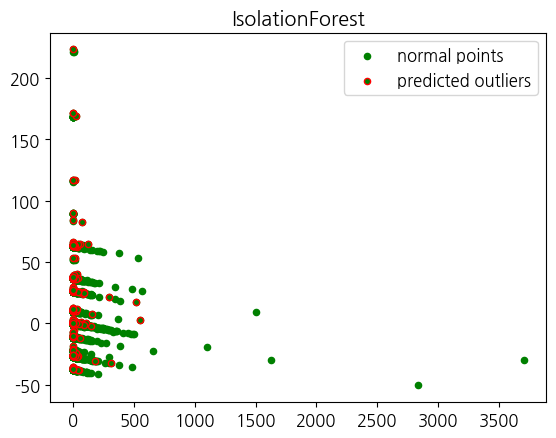

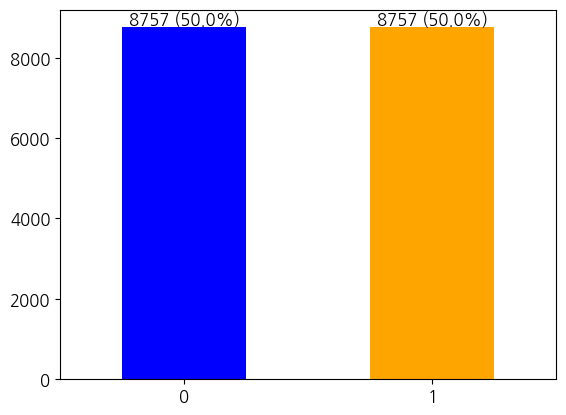

(30320, 84) (30320,) (10210, 84) (10210,) (10210, 84) (10210,)
[LightGBM] [Info] Number of positive: 7022, number of negative: 17234
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002960 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7264
[LightGBM] [Info] Number of data points in the train set: 24256, number of used features: 52
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.289495 -> initscore=-0.897836
[LightGBM] [Info] Start training from score -0.897836
[LightGBM] [Info] Number of positive: 7004, number of negative: 17252
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002734 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7278
[LightGBM] [Info] Number of data points in the train set: 24256, number of used features: 52
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.288753 -> initscore=-0.901447
[Ligh

0            1  accuracy     macro avg  \
dataset    metric                                                         
train_data precision  0.882672      0.463484     0.675000  0.673078       
           recall     0.626258      0.795021     0.675000  0.710640       
           f1-score   0.732679      0.585583     0.675000  0.659131       
           support    21563.000000  8757.000000  0.675000  30320.000000   
val_data   precision  0.804931      0.379961     0.590989  0.592446       
           recall     0.561502      0.663834     0.590989  0.612668       
           f1-score   0.661533      0.483296     0.590989  0.572415       
           support    7268.000000   2942.000000  0.590989  10210.000000   
test_data  precision  0.807807      0.380998     0.590891  0.594403       
           recall     0.558063      0.671992     0.590891  0.615027       
           f1-score   0.660103      0.486287     0.590891  0.573195       
           support    7268.000000   2942.000000  0.590891  10210.000000   

                      weighted avg       roc  
dataset    metric                             
train_data precision  0.761603      0.787464  
           recall     0.675000      0.787464  
           f1-score   0.690195      0.787464  
           support    30320.000000  0.787464  
val_data   precision  0.682476      0.662983  
           recall     0.590989      0.662983  
           f1-score   0.610175      0.662983  
           support    10210.000000  0.662983  
test_data  precision  0.684823      0.663119  
           recall     0.590891      0.663119  
           f1-score   0.610018      0.663119  
           support    10210.000000  0.663119

In [142]:
%%time

# 여기서 DataTransformer class에서 사용할 두 변수를 미리 선언
# 카이제곱 검정, T-검정을 통해 컬럼 선별된 것들을 쓸 것이며(featureSelection), 결측치 대체할 것임(missingIndicator)
data_transformer = DataTransformer(missingIndicator=True, featureSelection=True)

# 언더샘플링을 통한 데이터 불균형 조정
model = make_pipeline(RandomUnderSampler(random_state=Config.RANDOM_SEED), RandomForestClassifier(random_state=Config.RANDOM_SEED))

# 위에서 선언한 model, data_transformer, pbound를 여기서 Experiment Class에 넣어줌 
exp = Experiment(model, data_transformer,
                 {"randomforestclassifier__max_depth":(3,50), "randomforestclassifier__max_features":(4, 150),
                  "randomforestclassifier__max_features":(4, 50), "randomforestclassifier__n_estimators":(10, 400),
                  "randomforestclassifier__min_samples_split":(2, 200), "randomforestclassifier__min_samples_leaf":(20,300)})

# Experiment class의 run함수부분 실행
# 준비된 데이터프레임을 넣고, 하이퍼 파라미터 튜닝 실행
result, results_df = exp.run(df, hptuning=True)
result

In [143]:
results_df

,model_name,accuracy,precision,recall,f1,specificity,roc
0,RandomForestClassifier,0.719687,0.610497,0.075119,0.133777,0.980600,0.527859
1,DecisionTreeClassifier,0.636337,0.358532,0.332087,0.344803,0.759494,0.545790
2,AdaBoostClassifier,0.718022,0.547655,0.123046,0.200944,0.958861,0.540953
3,GradientBoostingClassifier,0.722429,0.622727,0.093134,0.162034,0.977160,0.535147
4,LogisticRegression,0.712341,0.511848,0.036710,0.068506,0.985828,0.511269
5,XgboostClassifier,0.710872,0.496667,0.253229,0.335434,0.896120,0.574675
6,LGBMClassifier,0.720176,0.566096,0.123725,0.203068,0.961613,0.542669


## Submission

In [84]:
df_test = df_test.drop('Churn', axis=1)
results, predictions, probas = exp.test_run(df_test, hptuning=True)

In [85]:
probas = pd.DataFrame(probas)
probas.rename(columns={0: 'proba_N', 1: 'proba_Y'}, inplace=True)
df_predictions = pd.DataFrame({'CustomerID': df_test.index, 'Churn_Predicted': predictions})
df_probas = pd.DataFrame({'CustomerID': df_test.index, 'Predict_Proba_N': probas.proba_N, 'Predict_Proba_Y': probas.proba_Y})
df_pred = pd.merge(df_probas, df_predictions, on='CustomerID')

print(df_predictions[df_predictions['Churn_Predicted']==1].count())
print(df_predictions[df_predictions['Churn_Predicted']==0].count())

df_pred['Churn_Predicted'] = df_pred['Churn_Predicted'].replace((0, 1), ('No', 'Yes'))
df_pred.set_index('CustomerID', inplace=True)
df_pred.head()

CustomerID         10553
Churn_Predicted    10553
dtype: int64
CustomerID         9447
Churn_Predicted    9447
dtype: int64


,Predict_Proba_N,Predict_Proba_Y,Churn_Predicted
CustomerID,,,
3000006,0.596410,0.403590,No
3000018,0.581845,0.418155,No
3000034,0.484186,0.515814,Yes
3000070,0.672708,0.327292,No
3000074,0.644808,0.355192,No


In [86]:
# 태블로 시각화하기위한 데이터셋 생성(정수형/문자형 None값 각각 대치 완료)
df_tableau = df.copy()
df_tableau_cont = df_tableau.select_dtypes(exclude=['object']).fillna(df_tableau.mean())
df_tableau_cat = df_tableau.select_dtypes(include=['object']).fillna('Unknown')
df_tableau = df_tableau_cont.join(df_tableau_cat)
df_tableau.to_csv('dataset.csv', index=True)
df_tableau

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating,HandsetPrice,CreditRating,Age,Churn,ServiceArea,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,NewCellphoneUser,NotNewCellphoneUser,OwnsMotorcycle,MadeCallToRetentionTeam,PrizmCode,Occupation,MaritalStatus,Family
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3000002,24.000000,219.000000,22.000000,0.250000,0.000000,0.000000,-157.000000,-19.000000,0.7,0.7,6.3,0.0,0.0,97.2,0.0,0.0,58.0,24.0,1.3,0.0,0.3,61,2,1,2.0,2.0,361.0,1,0,0,4,0,30.000000,1,31.0,Yes,SEAPOR503,No,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,No,No,No,Yes,Suburban,Professional,No,Unknown
3000010,16.990000,10.000000,17.000000,0.000000,0.000000,0.000000,-4.000000,0.000000,0.3,0.0,2.7,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.3,0.0,0.0,58,1,1,2.0,1.0,1504.0,0,0,0,5,0,30.000000,4,41.0,Yes,PITHOM412,Yes,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,Yes,No,No,No,Suburban,Professional,Yes,Nuclear Families
3000014,38.000000,8.000000,38.000000,0.000000,0.000000,0.000000,-2.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.4,0.3,0.0,1.3,3.7,0.0,0.0,0.0,60,1,1,1.0,1.0,1812.0,0,0,0,6,0,82.237933,3,26.0,No,MILMIL414,Yes,No,No,No,No,Unknown,No,No,No,No,No,Yes,Yes,No,No,No,Town,Crafts,Yes,Nuclear Families
3000022,82.280000,1312.000000,75.000000,1.240000,0.000000,0.000000,157.000000,8.100000,52.0,7.7,76.0,4.3,1.3,200.3,370.3,147.0,555.7,303.7,59.7,0.0,22.7,59,2,2,9.0,4.0,458.0,0,0,0,6,0,10.000000,4,15.0,No,PITHOM412,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,Yes,No,No,No,Other,Other,No,Unknown
3000026,17.140000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,-0.200000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,2,2,4.0,3.0,852.0,0,0,0,9,1,10.000000,1,50.0,Yes,OKCTUL918,No,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,No,Yes,No,No,Other,Professional,Yes,Childless
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3399958,58.834492,525.653416,46.830088,0.895229,40.027785,1.236244,-11.547908,-1.191985,9.3,2.7,48.3,0.0,0.0,58.9,17.0,1.3,160.3,33.3,12.0,0.0,0.3,29,1,1,2.0,2.0,526.0,0,0,0,6,0,60.000000,1,66.0,Yes,LAXSFN818,No,Yes,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,No,No,No,No,Suburban,Other,Yes,Childless
3399974,95.170000,1745.000000,85.000000,0.990000,45.000000,4.700000,122.000000,15.900000,16.7,0.7,41.3,0.0,0.0,681.5,89.7,33.3,318.7,248.3,17.3,0.0,14.3,29,1,1,2.0,2.0,464.0,0,0,0,9,1,60.000000,3,48.0,No,LAXCDG310,Yes,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,No,No,No,No,Other,Other,No,Single-parent
3399978,58.834492,525.653416,46.830088,0.895229,40.027785,1.236244,-11.547908,-1.191985,71.7,4.3,287.0,1.3,13.7,1225.3,430.3,87.7,1359.0,910.3,76.0,0.0,6.7,25,1,1,3.0,2.0,378.0,0,0,0,7,1,80.000000,5,18.0,Yes,LAXCDG310,No,No,Yes,No,No,Known,No,No,No,No,No,Yes,No,No,No,No,Other,Clerical,No,Unknown
